<a href="https://colab.research.google.com/github/Strugoeden121/CausalInferenceNBA-/blob/main/NBA_PROJECT_Full_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

base_dir = "Datasets"

game_df = pd.read_csv(f"{base_dir}/game.csv")
player_game_stats_df = pd.read_csv(f"{base_dir}/player_game_stats.csv")
player_salary_df = pd.read_csv(f"{base_dir}/player_salary.csv")
team_df = pd.read_csv(f"{base_dir}/team.csv")
season_df = pd.read_csv(f"{base_dir}/season.csv")
lineup_game_stats_df = pd.read_csv(f"{base_dir}/lineup_game_stats.csv")
lineup_df = pd.read_csv(f"{base_dir}/lineup.csv")
lineup_player_df = pd.read_csv(f"{base_dir}/lineup_player.csv")
play_for_df = pd.read_csv(f"{base_dir}/play_for.csv")
team_game_stats_df = pd.read_csv(f"{base_dir}/team_game_stats.csv")
player_df = pd.read_csv(f"{base_dir}/player.csv")



In [ ]:
# Example: Print the first few rows of each table
print(game_df.head())
print("______________________________________________________________________________________________")
print(player_game_stats_df.head())
print("______________________________________________________________________________________________")
print(lineup_game_stats_df.head())
print("______________________________________________________________________________________________")
print(lineup_player_df.head())
print("______________________________________________________________________________________________")
print(team_df.head(30))
print("______________________________________________________________________________________________")
print(season_df.head(30))


    game_date  home_points  away_points  home_possessions  away_possessions  \
0  2012-11-03           85           95               102               102   
1  2012-11-07           87           93                96                96   
2  2012-11-10           96           82                95                94   
3  2012-11-12          110          113                94                94   
4  2012-11-14          100           96                92                91   

   home_id  away_id  winner_id  season_id  
0        9       16         16          4  
1        9       26         26          4  
2        9        4          9          4  
3        9       24         24          4  
4        9       19          9          4  
______________________________________________________________________________________________
    game_date  home_id  minutes  offposs  points  fg_two_m  fg_two_a  \
0  2012-11-12        9     0.52        1       0         0         0   
1  2012-11-21        9

In [ ]:
#Join team with games

# Merge home team names
game_with_teams = pd.merge(
    game_df,
    team_df,
    left_on="home_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "home_team"})

# Merge away team names
game_with_teams = pd.merge(
    game_with_teams,
    team_df,
    left_on="away_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "away_team"})

# Merge winner team names
game_with_teams = pd.merge(
    game_with_teams,
    team_df,
    left_on="winner_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "winner_team"})

# Drop duplicate columns
game_with_teams = game_with_teams.drop(columns=["team_id_x", "team_id_y", "team_id"], errors="ignore")

# Verify all expected columns are present
expected_columns = [
    "game_date", "home_points", "away_points", "home_possessions",
    "away_possessions", "home_id", "away_id", "winner_id", "season_id",
    "home_team", "away_team", "winner_team"
]

for col in expected_columns:
    if col not in game_with_teams.columns:
        print(f"Column missing: {col}")



print(game_with_teams.head())

    game_date  home_points  away_points  home_possessions  away_possessions  \
0  2012-11-03           85           95               102               102   
1  2012-11-07           87           93                96                96   
2  2012-11-10           96           82                95                94   
3  2012-11-12          110          113                94                94   
4  2012-11-14          100           96                92                91   

   home_id  away_id  winner_id  season_id home_team away_team winner_team  
0        9       16         16          4       HOU       POR         POR  
1        9       26         26          4       HOU       DEN         DEN  
2        9        4          9          4       HOU       DET         HOU  
3        9       24         24          4       HOU       MIA         MIA  
4        9       19          9          4       HOU       NOP         HOU  


In [ ]:
# join game_team with season

# Merge season data with game_with_teams dataset
game_with_season = pd.merge(
    game_with_teams,
    season_df,
    on="season_id",
    how="left"
)

# Preview the resulting DataFrame
print("Game with Teams and Season DataFrame:")
print(game_with_season.head())

Game with Teams and Season DataFrame:
    game_date  home_points  away_points  home_possessions  away_possessions  \
0  2012-11-03           85           95               102               102   
1  2012-11-07           87           93                96                96   
2  2012-11-10           96           82                95                94   
3  2012-11-12          110          113                94                94   
4  2012-11-14          100           96                92                91   

   home_id  away_id  winner_id  season_id home_team away_team winner_team  \
0        9       16         16          4       HOU       POR         POR   
1        9       26         26          4       HOU       DEN         DEN   
2        9        4          9          4       HOU       DET         HOU   
3        9       24         24          4       HOU       MIA         MIA   
4        9       19          9          4       HOU       NOP         HOU   

  season_name     season

In [ ]:
# Step 1: Filter games won by GSW for the two seasons
# Filter games where GSW is either the home or away team
gsw_games = game_with_season[
    (game_with_season["home_team"] == "GSW") |
    (game_with_season["away_team"] == "GSW")
]


# Further filter for specific seasons (optional)
gsw_games = gsw_games[gsw_games["season_name"].isin(["2012-13", "2015-16"])]

# Step 2: Merge games with player_game_stats_df
gsw_games_scoring = pd.merge(
    player_game_stats_df,
    gsw_games,
    on=["game_date", "home_id"],  # Match games on game_date and home_id
    how="inner"
)
# Step 3: Merge with lineup stats to get lineup contributions
# Match on 'game_date', 'home_id', and 'lineupid'
gsw_lineup_stats = pd.merge(
    gsw_games_scoring,
    lineup_game_stats_df,
    on=["game_date", "home_id"],
    how="inner"
)



# Step 4: Merge with LineupPlayer to get players in the lineups
gsw_player_lineups = pd.merge(
    gsw_lineup_stats,
    lineup_player_df,
    on="lineup_id",
    how="inner"
)

print(gsw_player_lineups.columns)
# Step 5: Aggregate data to compare seasons
season_summary = gsw_player_lineups.groupby(["season_name", "player_id_y"]) \
    .agg(
        total_points=("points", "sum"),
        total_minutes=("mp", "sum"),
    ) \
    .reset_index()

# Step 6: Compare seasons
season_comparison = season_summary[season_summary["season_name"].isin(["2012-13", "2015-16"])]

# Display the season comparison
#print("Season Comparison:")
#print(season_comparison)
print(gsw_games_scoring.columns)

Index(['game_date', 'home_id', 'minutes', 'offposs', 'points', 'fg_two_m',
       'fg_two_a', 'fg_two_pct', 'fg_three_m', 'fg_three_a', 'fg_three_pct',
       'ftpoints', 'tspct', 'usage', 'player_id_x', 'assists', 'rebounds',
       'defrebounds', 'offrebounds', 'home_points', 'away_points',
       'home_possessions', 'away_possessions', 'away_id', 'winner_id',
       'season_id', 'home_team', 'away_team', 'winner_team', 'season_name',
       'season_type', 'lineup_id', 'mp', 'tmposs', 'oppo_tmposs',
       'player_id_y'],
      dtype='object')
Index(['game_date', 'home_id', 'minutes', 'offposs', 'points', 'fg_two_m',
       'fg_two_a', 'fg_two_pct', 'fg_three_m', 'fg_three_a', 'fg_three_pct',
       'ftpoints', 'tspct', 'usage', 'player_id', 'assists', 'rebounds',
       'defrebounds', 'offrebounds', 'home_points', 'away_points',
       'home_possessions', 'away_possessions', 'away_id', 'winner_id',
       'season_id', 'home_team', 'away_team', 'winner_team', 'season_name',
       's

In [ ]:
# Filter games won by GSW
gsw_wins = game_with_season[game_with_season["winner_team"] == "GSW"]

# Group by season and count wins
gsw_wins_summary = gsw_wins.groupby("season_name") \
    .size() \
    .reset_index(name="win")

# Rename columns for clarity (optional)
gsw_wins_summary = gsw_wins_summary.rename(columns={"season_name": "season", "win": "wins"})

# Display the result
print(gsw_wins_summary)



    season  wins
0  2009-10    26
1  2010-11    36
2  2011-12    23
3  2012-13    47
4  2013-14    51
5  2014-15    67
6  2015-16    73
7  2016-17    67
8  2017-18    58
9  2018-19    57


In [ ]:
# Merge gsw_lineup_stats with player_df on player_id
gsw_lineup_with_players = pd.merge(
    gsw_games_scoring,
    player_df,
    on="player_id",
    how="inner"  # Use inner join to include only matching rows
)

# Display the resulting DataFrame
print("GSW Lineup Stats with Player Info:")
print(gsw_lineup_with_players.columns)

gsw_lineup_with_players.to_csv("gsw_lineup_with_players.csv", index=False)



GSW Lineup Stats with Player Info:
Index(['game_date', 'home_id', 'minutes', 'offposs', 'points', 'fg_two_m',
       'fg_two_a', 'fg_two_pct', 'fg_three_m', 'fg_three_a', 'fg_three_pct',
       'ftpoints', 'tspct', 'usage', 'player_id', 'assists', 'rebounds',
       'defrebounds', 'offrebounds', 'home_points', 'away_points',
       'home_possessions', 'away_possessions', 'away_id', 'winner_id',
       'season_id', 'home_team', 'away_team', 'winner_team', 'season_name',
       'season_type', 'player_name'],
      dtype='object')


In [ ]:
print(gsw_lineup_with_players.columns)

Index(['game_date', 'home_id', 'minutes', 'offposs', 'points', 'fg_two_m',
       'fg_two_a', 'fg_two_pct', 'fg_three_m', 'fg_three_a', 'fg_three_pct',
       'ftpoints', 'tspct', 'usage', 'player_id', 'assists', 'rebounds',
       'defrebounds', 'offrebounds', 'home_points', 'away_points',
       'home_possessions', 'away_possessions', 'away_id', 'winner_id',
       'season_id', 'home_team', 'away_team', 'winner_team', 'season_name',
       'season_type', 'player_name'],
      dtype='object')


In [ ]:
# List of columns to remove
columns_to_remove = [
    "home_id", "offposs", "fg_two_pct", "fg_three_pct", 'fg_two_m', 'fg_two_a', 'fg_three_m',
       'fg_three_a',
    "ftpoints", "tspct", "usage", "defrebounds", "offrebounds",
    "home_points", "away_points", "home_possessions", "away_possessions"
]

# Drop the specified columns
gsw_lineup_with_players_cleaned = gsw_lineup_with_players.drop(columns=columns_to_remove, errors="ignore")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(gsw_lineup_with_players_cleaned.head())


Cleaned DataFrame:
    game_date  minutes  points  player_id  assists  rebounds  away_id  \
0  2013-02-05    21.93       8        242        4         8        2   
1  2013-03-17    12.42       0        104        0         0        2   
2  2012-12-05    30.63      15        445        0        12        2   
3  2012-12-05    19.23      11        175        0         4        2   
4  2012-12-05    22.65      10        262        1         3        2   

   winner_id  season_id home_team away_team winner_team season_name  \
0          9          4       HOU       GSW         HOU     2012-13   
1          2          4       HOU       GSW         GSW     2012-13   
2          2          4       DET       GSW         GSW     2012-13   
3          2          4       DET       GSW         GSW     2012-13   
4          2          4       DET       GSW         GSW     2012-13   

      season_type         player_name  
0  regular season      James Anderson  
1  regular season    Francisco Garc

In [ ]:
# Filter rows where player_name is "Stephen Curry"
steph_curry_data = gsw_lineup_with_players_cleaned[
    gsw_lineup_with_players_cleaned["player_name"] == "Stephen Curry"
]

# Display the filtered DataFrame
print("Stephen Curry Data:")
print(steph_curry_data.head())


steph_curry_data.to_csv("steph_curry_data.csv", index=False)

Stephen Curry Data:
      game_date  minutes  points  player_id  assists  rebounds  away_id  \
50   2012-11-02    42.50      26        429        7         5       21   
55   2012-11-10    37.20      19        429        3         5       26   
91   2013-03-08    42.93      24        429        8         5        9   
103  2013-03-27    45.58      17        429       12         5       11   
107  2013-04-09    39.20      24        429       10         4       20   

     winner_id  season_id home_team away_team winner_team season_name  \
50          21          4       GSW       MEM         MEM     2012-13   
55          26          4       GSW       DEN         DEN     2012-13   
91           9          4       GSW       HOU         HOU     2012-13   
103         11          4       GSW       SAC         SAC     2012-13   
107          2          4       GSW       MIN         GSW     2012-13   

        season_type    player_name  
50   regular season  Stephen Curry  
55   regular sea

In [ ]:
# Filter rows where player_name is "Stephen Curry" and points >= 23
steph_curry_high_scoring_games = gsw_lineup_with_players_cleaned[
    (gsw_lineup_with_players_cleaned["player_name"] == "Stephen Curry") &
    (gsw_lineup_with_players_cleaned["points"] >= 23) &
    (gsw_lineup_with_players_cleaned["winner_team"] == "GSW")
]

# Group by season and count the number of games
steph_curry_seasonal_counts = steph_curry_high_scoring_games.groupby("season_name") \
    .agg(num_games=("game_date", "nunique")) \
    .reset_index()

# Display the result
print("Stephen Curry High-Scoring Games by Season:")
print(steph_curry_seasonal_counts)


Stephen Curry High-Scoring Games by Season:
  season_name  num_games
0     2012-13         21
1     2015-16         58


In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [ ]:
print(steph_curry_data.columns)

Index(['game_date', 'minutes', 'points', 'player_id', 'assists', 'rebounds',
       'away_id', 'winner_id', 'season_id', 'home_team', 'away_team',
       'winner_team', 'season_name', 'season_type', 'player_name'],
      dtype='object')


In [ ]:
dag_data = [
    ("minutes", "points"),         # More minutes played may lead to more points
    ("minutes", "rebounds"),
    ("minutes", "assists"),
    ("points", "winner_team"),     # Points scored influence the winner
    ("rebounds", "winner_team"),
    ("assists", "winner_team"),
    ("season_name", "winner_team") # Seasons may influence the winner (contextual)
]

Is Directed Acyclic Graph (DAG): True


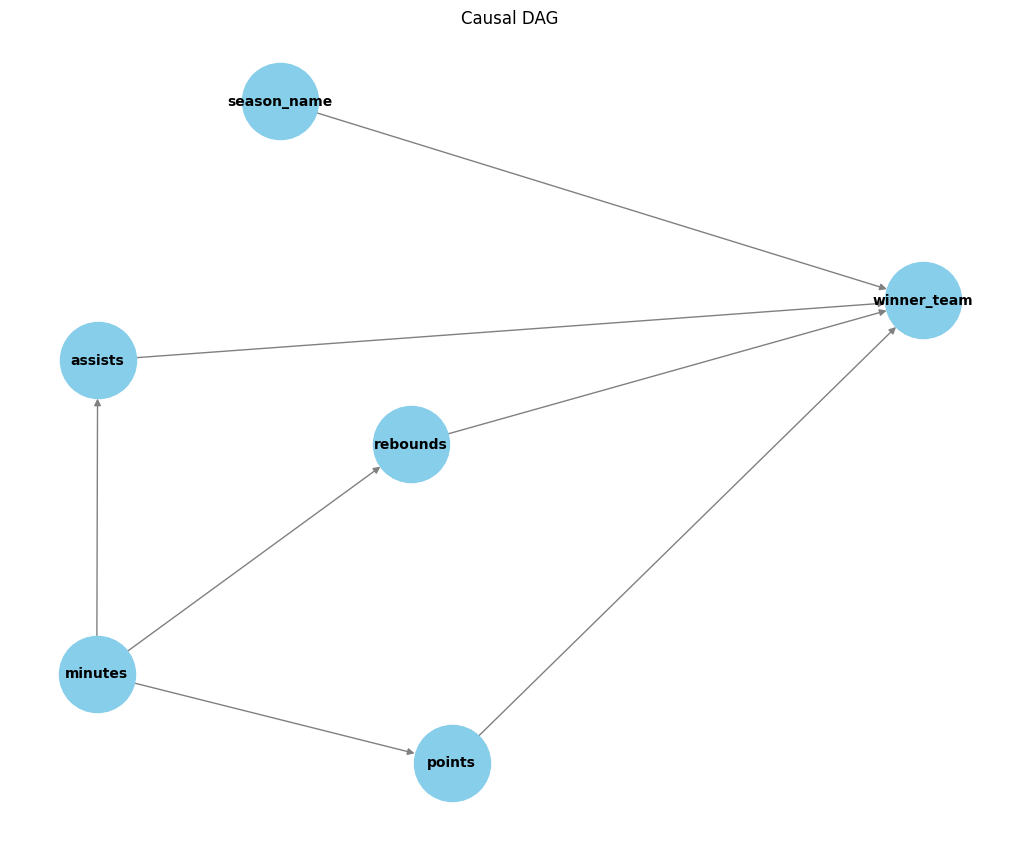

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG
plt.figure(figsize=(10, 8))
nx.draw(
    dag,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    pos=nx.spring_layout(dag)  # Spring layout for better visualization
)
plt.title("Causal DAG")
plt.show()

In [ ]:
# Create a new column 'steph_scored_23_plus' indicating if Stephen Curry scored >= 23 points
gsw_lineup_with_players_cleaned["steph_scored_23_plus"] = (
    (gsw_lineup_with_players_cleaned["player_name"] == "Stephen Curry") &
    (gsw_lineup_with_players_cleaned["points"] >= 23)
)

# Convert the boolean column to integer (optional)
gsw_lineup_with_players_cleaned["steph_scored_23_plus"] = gsw_lineup_with_players_cleaned["steph_scored_23_plus"].astype(int)

# Create a new column 'gsw_won' indicating if GSW won the game
gsw_lineup_with_players_cleaned["gsw_won"] = (
    gsw_lineup_with_players_cleaned["winner_team"] == "GSW"
).astype(int)

# Display the updated DataFrame
print(gsw_lineup_with_players_cleaned.head())



    game_date  minutes  points  player_id  assists  rebounds  away_id  \
0  2013-02-05    21.93       8        242        4         8        2   
1  2013-03-17    12.42       0        104        0         0        2   
2  2012-12-05    30.63      15        445        0        12        2   
3  2012-12-05    19.23      11        175        0         4        2   
4  2012-12-05    22.65      10        262        1         3        2   

   winner_id  season_id home_team away_team winner_team season_name  \
0          9          4       HOU       GSW         HOU     2012-13   
1          2          4       HOU       GSW         GSW     2012-13   
2          2          4       DET       GSW         GSW     2012-13   
3          2          4       DET       GSW         GSW     2012-13   
4          2          4       DET       GSW         GSW     2012-13   

      season_type         player_name  steph_scored_23_plus  gsw_won  
0  regular season      James Anderson                     0    

In [ ]:
def causal_dag_manipulation_solo(dag_data, treatment):
    """
    Modify the DAG to account for a single treatment variable.

    Parameters:
    - dag_data: A NetworkX directed graph (DiGraph).
    - treatment: The treatment variable to focus on.

    Returns:
    - new_dag_data: A list of edges representing the modified DAG.
    """
    # Extract edges from the graph
    dag_data = list(dag_data.edges)
    print("Original DAG Edges:", dag_data)

    # Replace all source or target nodes with the treatment variable
    new_dag_data = []
    for source, target in dag_data:
        new_source = treatment if source == treatment else source
        new_target = treatment if target == treatment else target
        if new_source == new_target:  # Avoid self-loops
            continue
        new_dag_data.append((new_source, new_target))

    # Create a new directed graph using NetworkX
    dag_graph = nx.DiGraph()
    dag_graph.add_edges_from(new_dag_data)

    # Plot the modified DAG
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(dag_graph)  # Position nodes using spring layout for better visualization
    nx.draw(dag_graph, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
    plt.title(f'Modified Causal DAG Focused on {treatment}', fontsize=16)
    plt.show()

    # Return the new DAG as a list of edges
    return new_dag_data

Is Directed Acyclic Graph (DAG): True


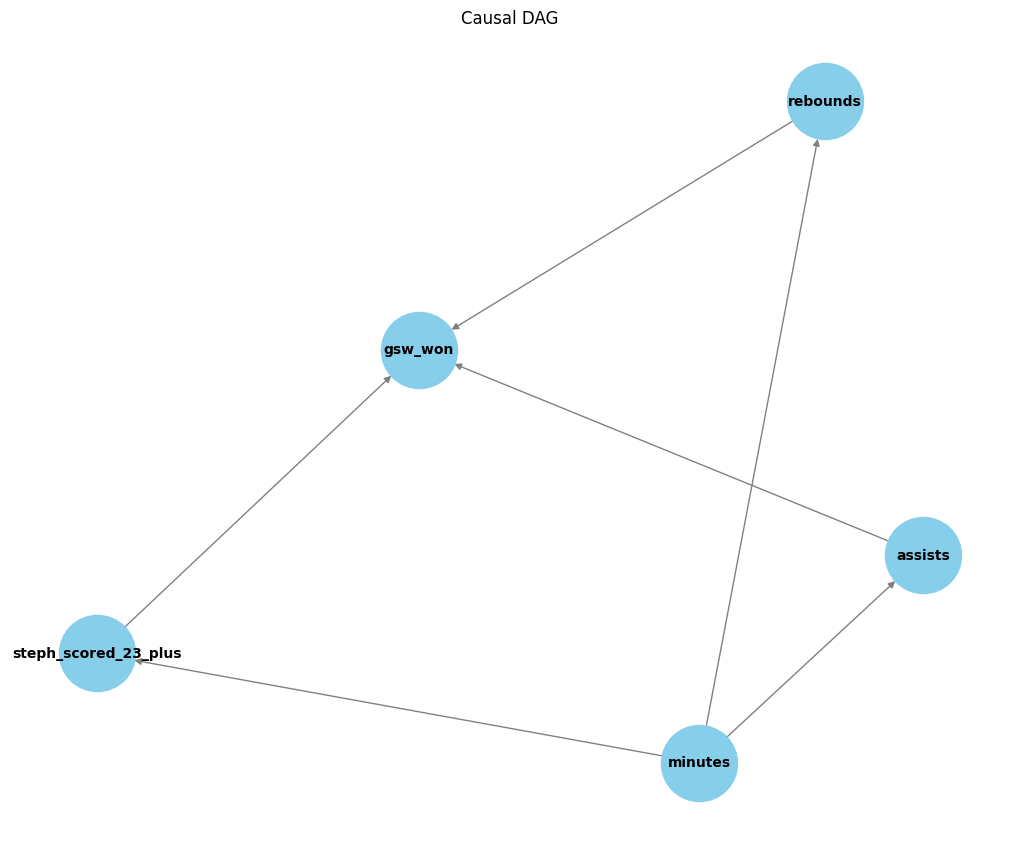

In [ ]:
dag_edges = [
    ("minutes", "steph_scored_23_plus"),         # More minutes played may lead to more points
    ("minutes", "rebounds"),
    ("minutes", "assists"),
    ("steph_scored_23_plus", "gsw_won"),     # Points scored influence the winner
    ("rebounds", "gsw_won"),
    ("assists", "gsw_won"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_edges))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG
plt.figure(figsize=(10, 8))
nx.draw(
    dag,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    pos=nx.spring_layout(dag)  # Spring layout for better visualization
)
plt.title("Causal DAG")
plt.show()

In [ ]:
def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05


In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=gsw_lineup_with_players_cleaned,
    treatment='steph_scored_23_plus',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
           d                               
───────────────────────(E[gsw_won|minutes])
d[steph_scored_23_plus]                    
Estimand assumption 1, Unconfoundedness: If U→{steph_scored_23_plus} and U→gsw_won then P(gsw_won|steph_scored_23_plus,minutes,U) = P(gsw_won|steph_scored_23_plus,minutes)

## Realized estimand
b: gsw_won~steph_scored_23_plus+minutes
Target units: ate

## Estimate
Mean value: 0.056397606994829874
p-value: [0.21786]

Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: [0.21786]


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:0.056397606994829874
New effect:0.0563069836173679
p value:0.86



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
# After Seecond Meeting

In [ ]:

# Step 2: Merge games with player_game_stats_df
games_scoring = pd.merge(
    player_game_stats_df,
    game_with_season,
    on=["game_date", "home_id"],  # Match games on game_date and home_id
    how="inner"
)
print(games_scoring.columns)
print(games_scoring.head())


Index(['game_date', 'home_id', 'minutes', 'offposs', 'points', 'fg_two_m',
       'fg_two_a', 'fg_two_pct', 'fg_three_m', 'fg_three_a', 'fg_three_pct',
       'ftpoints', 'tspct', 'usage', 'player_id', 'assists', 'rebounds',
       'defrebounds', 'offrebounds', 'home_points', 'away_points',
       'home_possessions', 'away_possessions', 'away_id', 'winner_id',
       'season_id', 'home_team', 'away_team', 'winner_team', 'season_name',
       'season_type'],
      dtype='object')
    game_date  home_id  minutes  offposs  points  fg_two_m  fg_two_a  \
0  2012-11-12        9     0.52        1       0         0         0   
1  2012-11-21        9    42.42       89      28         5         7   
2  2012-11-21        9    26.12       55       4         2         7   
3  2012-11-23        9    17.32       36      11         0         2   
4  2012-11-27        9    41.50       83      18         5         9   

   fg_two_pct  fg_three_m  fg_three_a  ...  home_possessions  \
0        0.00      

In [ ]:
player_with_team = pd.merge(
    play_for_df,
    player_df,
    on="player_id",
    how="inner"  # Use inner join to include only matching rows
)

player_with_team_steph = player_with_team[
    (player_with_team["player_name"] == "Stephen Curry")
]
print(player_with_team_steph.head())

player_with_team = pd.merge(
    player_with_team,
    team_df,
    on="team_id",
    how="inner"  # Use inner join to include only matching rows
)

player_with_team = player_with_team.rename(columns={"team": "player_team"})
print(player_with_team.head())



     team_id  date_start    date_end  player_id    player_name
191        2  2009-10-28  2019-04-09        429  Stephen Curry
   team_id  date_start    date_end  player_id    player_name player_team
0        1  2017-10-18  2018-04-11       1145    Abdel Nader         BOS
1        1  2016-10-26  2019-04-07        267     Al Horford         BOS
2        1  2015-10-28  2017-04-12        468   Amir Johnson         BOS
3        1  2017-10-17  2019-04-07         70    Aron Baynes         BOS
4        1  2010-11-22  2017-04-12        266  Avery Bradley         BOS


In [ ]:

# View the updated DataFrame with new average columns
games_scoring = pd.merge(
    games_scoring,
    player_with_team,
    on="player_id",
    how="inner"  # Use inner join to include only matching rows
)
print(games_scoring.shape[0])

# Calculate average points, rebounds, and assists for each team in each game
filtered_games_scoring = games_scoring[
    (games_scoring['game_date'] >= games_scoring['date_start']) &
    (games_scoring['game_date'] <= games_scoring['date_end'])
]

game_team_averages = filtered_games_scoring.groupby(['game_date', 'player_team']).agg({
    'points': 'mean',
    'rebounds': 'mean',
    'assists': 'mean',
    'minutes': 'mean'
}).reset_index()

# Rename columns for clarity
game_team_averages.rename(columns={
    'points': 'avg_team_points',
    'rebounds': 'avg_team_rebounds',
    'assists': 'avg_team_assists',
    'minutes': 'avg_team_minutes'
}, inplace=True)

# Merge the averages back into the original DataFrame
games_scoring = pd.merge(
    filtered_games_scoring,
    game_team_averages,
    on=['game_date', 'player_team'],
    how='left'
)



# List of columns to remove
columns_to_remove = [
    "home_id", "offposs", "fg_two_pct", "fg_three_pct", 'fg_two_m', 'fg_two_a', 'fg_three_m',
       'fg_three_a',"ftpoints", "tspct", "usage", "defrebounds", "offrebounds",
    "home_possessions", "away_possessions", "season_type", "away_id", "winner_id",
    "season_id", "team_id"

]
games_scoring = games_scoring.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(games_scoring.head())




858697
    game_date  minutes  points  player_id  assists  rebounds  home_points  \
0  2012-11-12     0.52       0        201        0         0          110   
1  2012-11-21    42.42      28        359        3         4           93   
2  2012-11-21    26.12       4        368        3         4           93   
3  2012-11-23    17.32      11         61        1         2          131   
4  2012-11-27    41.50      18         57        5         7          117   

   away_points home_team away_team winner_team season_name  date_start  \
0          113       HOU       MIA         MIA     2012-13  2012-11-10   
1           89       HOU       CHI         HOU     2012-13  2012-10-31   
2           89       HOU       CHI         HOU     2012-13  2012-10-31   
3          103       HOU       NYK         HOU     2012-13  2012-10-31   
4          101       HOU       TOR         HOU     2012-13  2011-12-29   

     date_end       player_name player_team  avg_team_points  \
0  2019-03-08    Terr

In [ ]:
games_scoring.to_csv("_general_games_scoring_5.csv", index=False)

In [ ]:
print(games_scoring.shape[0])

264618


Is Directed Acyclic Graph (DAG): True


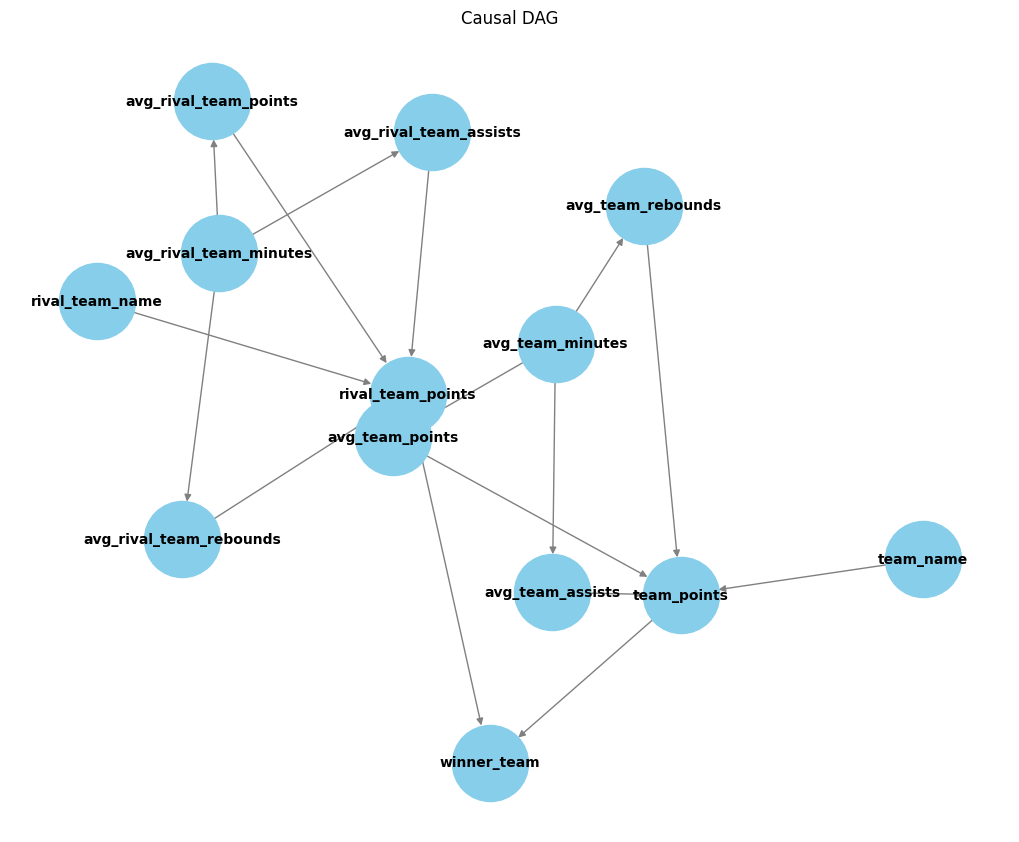

In [ ]:
dag_data = [
    ("team_name", "team_points"),
    ("rival_team_name", "rival_team_points"),
    ("rival_team_points", "winner_team"),
    ("team_points", "winner_team"),
    ("avg_team_minutes", "avg_team_points"),         # More minutes played may lead to more points
    ("avg_team_minutes", "avg_team_rebounds"),
    ("avg_team_minutes", "avg_team_assists"),
    ("avg_rival_team_minutes", "avg_rival_team_points"),         # More minutes played may lead to more points
    ("avg_rival_team_minutes", "avg_rival_team_rebounds"),
    ("avg_rival_team_minutes", "avg_rival_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG
plt.figure(figsize=(10, 8))
nx.draw(
    dag,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    pos=nx.spring_layout(dag)  # Spring layout for better visualization
)
plt.title("Causal DAG")
plt.show()

In [ ]:
#Finished with geeneral dataset and general DAG - not correlated

In [ ]:
# Query 1 - Steph >= 23 points
# 1 - create team and rival team - instead of home and away team
# 2 - match avg stats to to team and rival team and add both columns per game
# 3 - filter for GSW games and minutes steph = 0
# 4 - add binary columns
# 5 - augment DAG
# 6 - DOWhy

In [ ]:
# 1
# Create a copy of the dataset where team_name is home_team
home_team_data = games_scoring.copy()
home_team_data['team_name'] = home_team_data['home_team']
home_team_data['rival_team_name'] = home_team_data['away_team']

# Create a copy of the dataset where team_name is away_team
away_team_data = games_scoring.copy()
away_team_data['team_name'] = away_team_data['away_team']
away_team_data['rival_team_name'] = away_team_data['home_team']

# Concatenate the two datasets to get twice the rows
duplicated_games_scoring = pd.concat([home_team_data, away_team_data], ignore_index=True)

# View the resulting dataset
print(duplicated_games_scoring.head())
print(f"Number of rows in the new dataset: {duplicated_games_scoring.shape[0]}")


# Add team_points and rival_team_points
duplicated_games_scoring['team_points'] = duplicated_games_scoring.apply(
    lambda row: row['home_points'] if row['team_name'] == row['home_team'] else row['away_points'], axis=1
)

duplicated_games_scoring['rival_team_points'] = duplicated_games_scoring.apply(
    lambda row: row['away_points'] if row['team_name'] == row['home_team'] else row['home_points'], axis=1
)

# View the updated DataFrame
print(duplicated_games_scoring.head())
print(f"Number of rows in the updated dataset: {duplicated_games_scoring.shape[0]}")

    game_date  minutes  points  player_id  assists  rebounds  home_points  \
0  2012-11-12     0.52       0        201        0         0          110   
1  2012-11-21    42.42      28        359        3         4           93   
2  2012-11-21    26.12       4        368        3         4           93   
3  2012-11-23    17.32      11         61        1         2          131   
4  2012-11-27    41.50      18         57        5         7          117   

   away_points home_team away_team  ...  date_start    date_end  \
0          113       HOU       MIA  ...  2012-11-10  2019-03-08   
1           89       HOU       CHI  ...  2012-10-31  2019-04-09   
2           89       HOU       CHI  ...  2012-10-31  2014-04-14   
3          103       HOU       NYK  ...  2012-10-31  2013-02-08   
4          101       HOU       TOR  ...  2011-12-29  2014-04-14   

        player_name player_team avg_team_points avg_team_rebounds  \
0    Terrence Jones         HOU       12.222222          4.444444

In [ ]:
columns_to_remove = [
    "home_team", "away_team", "date_start", "date_end","away_points", "home_points"

]
duplicated_games_scoring = duplicated_games_scoring.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(duplicated_games_scoring.head())


    game_date  minutes  points  player_id  assists  rebounds winner_team  \
0  2012-11-12     0.52       0        201        0         0         MIA   
1  2012-11-21    42.42      28        359        3         4         HOU   
2  2012-11-21    26.12       4        368        3         4         HOU   
3  2012-11-23    17.32      11         61        1         2         HOU   
4  2012-11-27    41.50      18         57        5         7         HOU   

  season_name       player_name player_team  avg_team_points  \
0     2012-13    Terrence Jones         HOU        12.222222   
1     2012-13      James Harden         HOU        11.636364   
2     2012-13        Jeremy Lin         HOU        11.636364   
3     2012-13     Toney Douglas         HOU        12.583333   
4     2012-13  Chandler Parsons         HOU         9.692308   

   avg_team_rebounds  avg_team_assists  avg_team_minutes team_name  \
0           4.444444          2.777778         26.667778       HOU   
1           6.2727

In [ ]:
duplicated_games_scoring['rival_player_team'] = duplicated_games_scoring.apply(
    lambda row: row['rival_team_name'] if row['player_team'] == row['team_name'] else row['team_name'],
    axis=1
)

# View the updated DataFrame
print(duplicated_games_scoring.head())

    game_date  minutes  points  player_id  assists  rebounds winner_team  \
0  2012-11-12     0.52       0        201        0         0         MIA   
1  2012-11-21    42.42      28        359        3         4         HOU   
2  2012-11-21    26.12       4        368        3         4         HOU   
3  2012-11-23    17.32      11         61        1         2         HOU   
4  2012-11-27    41.50      18         57        5         7         HOU   

  season_name       player_name player_team  avg_team_points  \
0     2012-13    Terrence Jones         HOU        12.222222   
1     2012-13      James Harden         HOU        11.636364   
2     2012-13        Jeremy Lin         HOU        11.636364   
3     2012-13     Toney Douglas         HOU        12.583333   
4     2012-13  Chandler Parsons         HOU         9.692308   

   avg_team_rebounds  avg_team_assists  avg_team_minutes team_name  \
0           4.444444          2.777778         26.667778       HOU   
1           6.2727

In [ ]:
#2
# Add the rival_player_team column based on the condition


rival_game_team_averages = duplicated_games_scoring.groupby(['game_date', 'rival_player_team']).agg({
    'points': 'mean',
    'rebounds': 'mean',
    'assists': 'mean',
    'minutes': 'mean'
}).reset_index()


# Rename columns for clarity
rival_game_team_averages.rename(columns={
    'points': 'avg_rival_team_points',
    'rebounds': 'avg_rival_team_rebounds',
    'assists': 'avg_rival_team_assists',
    'minutes': 'avg_rival_team_minutes'
}, inplace=True)
print(rival_game_team_averages.columns)

# Merge the averages back into the original DataFrame
duplicated_games_scoring_rivals = pd.merge(
    duplicated_games_scoring,
    rival_game_team_averages,
    on=['game_date', 'rival_player_team'],
    how='left'
)

Index(['game_date', 'rival_player_team', 'avg_rival_team_points',
       'avg_rival_team_rebounds', 'avg_rival_team_assists',
       'avg_rival_team_minutes'],
      dtype='object')


In [ ]:
print(duplicated_games_scoring_rivals.head())

    game_date  minutes  points  player_id  assists  rebounds winner_team  \
0  2012-11-12     0.52       0        201        0         0         MIA   
1  2012-11-21    42.42      28        359        3         4         HOU   
2  2012-11-21    26.12       4        368        3         4         HOU   
3  2012-11-23    17.32      11         61        1         2         HOU   
4  2012-11-27    41.50      18         57        5         7         HOU   

  season_name       player_name player_team  ...  avg_team_minutes  team_name  \
0     2012-13    Terrence Jones         HOU  ...         26.667778        HOU   
1     2012-13      James Harden         HOU  ...         29.519091        HOU   
2     2012-13        Jeremy Lin         HOU  ...         29.519091        HOU   
3     2012-13     Toney Douglas         HOU  ...         23.941667        HOU   
4     2012-13  Chandler Parsons         HOU  ...         22.520769        HOU   

   rival_team_name  team_points rival_team_points rival_

In [ ]:
duplicated_games_scoring_rivals.to_csv("_general_games_scoring_8.csv", index=False)

In [ ]:
# 3
# Filter the rows where player_name is "Steph Curry"
steph_curry_data = duplicated_games_scoring_rivals[duplicated_games_scoring_rivals['player_name'] == "Stephen Curry"]

# View the filtered dataset
print(steph_curry_data.head())
print(f"Number of rows for Steph Curry: {steph_curry_data.shape[0]}")

       game_date  minutes  points  player_id  assists  rebounds winner_team  \
1436  2012-11-02    42.50      26        429        7         5         MEM   
1441  2012-11-10    37.20      19        429        3         5         DEN   
1485  2013-03-08    42.93      24        429        8         5         HOU   
1501  2013-03-27    45.58      17        429       12         5         SAC   
1505  2013-04-09    39.20      24        429       10         4         GSW   

     season_name    player_name player_team  ...  avg_team_minutes  team_name  \
1436     2012-13  Stephen Curry         GSW  ...         20.000833        GSW   
1441     2012-13  Stephen Curry         GSW  ...         24.165833        GSW   
1485     2012-13  Stephen Curry         GSW  ...         24.000000        GSW   
1501     2012-13  Stephen Curry         GSW  ...         24.001000        GSW   
1505     2012-13  Stephen Curry         GSW  ...         21.818182        GSW   

      rival_team_name  team_points riv

In [ ]:
# Filter out rows where minutes equals 0
steph_curry_data = steph_curry_data[steph_curry_data['minutes'] != 0]

# View the filtered dataset
print(steph_curry_data.head())
print(f"Number of rows after filtering: {steph_curry_data.shape[0]}")

       game_date  minutes  points  player_id  assists  rebounds winner_team  \
1436  2012-11-02    42.50      26        429        7         5         MEM   
1441  2012-11-10    37.20      19        429        3         5         DEN   
1485  2013-03-08    42.93      24        429        8         5         HOU   
1501  2013-03-27    45.58      17        429       12         5         SAC   
1505  2013-04-09    39.20      24        429       10         4         GSW   

     season_name    player_name player_team  ...  avg_team_minutes  team_name  \
1436     2012-13  Stephen Curry         GSW  ...         20.000833        GSW   
1441     2012-13  Stephen Curry         GSW  ...         24.165833        GSW   
1485     2012-13  Stephen Curry         GSW  ...         24.000000        GSW   
1501     2012-13  Stephen Curry         GSW  ...         24.001000        GSW   
1505     2012-13  Stephen Curry         GSW  ...         21.818182        GSW   

      rival_team_name  team_points riv

In [ ]:
# Add a column to indicate if Steph Curry scored more than 23 points
steph_curry_data['did_steph_scored_more_than_23_points'] = steph_curry_data.apply(
    lambda row: 1 if row['player_name'] == 'Stephen Curry' and row['points'] >= 23 else 0,
    axis=1
)

# View the updated dataset
print(steph_curry_data.head())


       game_date  minutes  points  player_id  assists  rebounds winner_team  \
1436  2012-11-02    42.50      26        429        7         5         MEM   
1441  2012-11-10    37.20      19        429        3         5         DEN   
1485  2013-03-08    42.93      24        429        8         5         HOU   
1501  2013-03-27    45.58      17        429       12         5         SAC   
1505  2013-04-09    39.20      24        429       10         4         GSW   

     season_name    player_name player_team  ...  team_name  rival_team_name  \
1436     2012-13  Stephen Curry         GSW  ...        GSW              MEM   
1441     2012-13  Stephen Curry         GSW  ...        GSW              DEN   
1485     2012-13  Stephen Curry         GSW  ...        GSW              HOU   
1501     2012-13  Stephen Curry         GSW  ...        GSW              SAC   
1505     2012-13  Stephen Curry         GSW  ...        GSW              MIN   

      team_points  rival_team_points rival_p

In [ ]:
# Replace 'column_name' with the name of the column you want to analyze
column_counts = steph_curry_data['did_steph_scored_more_than_23_points'].value_counts()

# Print the counts
print(column_counts)

did_steph_scored_more_than_23_points
1    742
0    646
Name: count, dtype: int64


In [ ]:
# Create a new column 'gsw_won' indicating if GSW won the game
steph_curry_data["gsw_won"] = (
    steph_curry_data["winner_team"] == "GSW"
).astype(int)
print(steph_curry_data.head())
column_counts = steph_curry_data['gsw_won'].value_counts()
# Print the counts
print(column_counts)

       game_date  minutes  points  player_id  assists  rebounds winner_team  \
1436  2012-11-02    42.50      26        429        7         5         MEM   
1441  2012-11-10    37.20      19        429        3         5         DEN   
1485  2013-03-08    42.93      24        429        8         5         HOU   
1501  2013-03-27    45.58      17        429       12         5         SAC   
1505  2013-04-09    39.20      24        429       10         4         GSW   

     season_name    player_name player_team  ...  rival_team_name  \
1436     2012-13  Stephen Curry         GSW  ...              MEM   
1441     2012-13  Stephen Curry         GSW  ...              DEN   
1485     2012-13  Stephen Curry         GSW  ...              HOU   
1501     2012-13  Stephen Curry         GSW  ...              SAC   
1505     2012-13  Stephen Curry         GSW  ...              MIN   

      team_points  rival_team_points  rival_player_team avg_rival_team_points  \
1436           94            

In [ ]:
columns_to_remove = [
    "winner_team", "assists", "rebounds", "points","minutes", "player_id",
    "season_name", "player_team", "player_name"
]
steph_curry_data = steph_curry_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(steph_curry_data.head())

       game_date  avg_team_points  avg_team_rebounds  avg_team_assists  \
1436  2012-11-02         7.833333           3.000000          1.750000   
1441  2012-11-10         8.416667           4.500000          1.916667   
1485  2013-03-08         8.800000           5.100000          1.800000   
1501  2013-03-27         9.800000           4.100000          3.000000   
1505  2013-04-09         9.545455           5.454545          2.181818   

      avg_team_minutes team_name rival_team_name  team_points  \
1436         20.000833       GSW             MEM           94   
1441         24.165833       GSW             DEN          101   
1485         24.000000       GSW             HOU           88   
1501         24.001000       GSW             SAC           98   
1505         21.818182       GSW             MIN          105   

      rival_team_points rival_player_team  avg_rival_team_points  \
1436                104               MEM               8.037037   
1441                107     

Is Directed Acyclic Graph (DAG): True


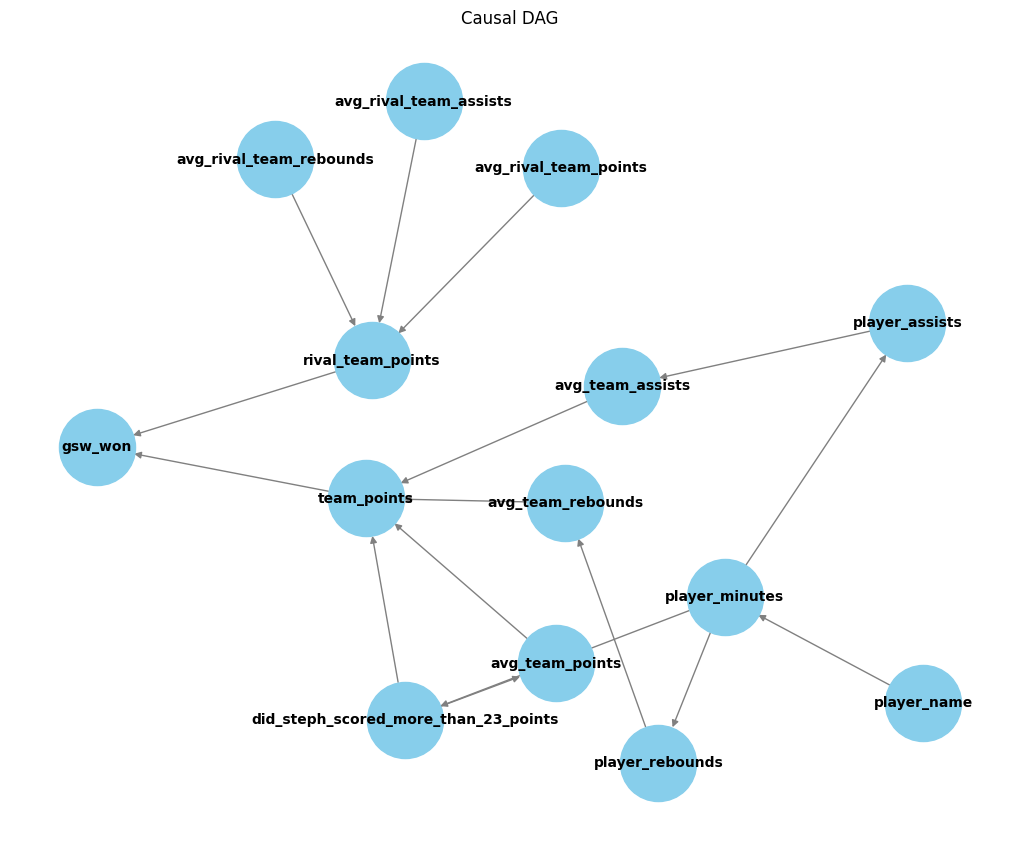

In [ ]:
dag_data = [
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("player_name", "player_minutes"),
    ("player_minutes", "player_assists"),
    ("player_minutes", "did_steph_scored_more_than_23_points"),
    ("player_minutes", "player_rebounds"),
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_steph_scored_more_than_23_points", "team_points"),     # Points scored influence the winner
    ("did_steph_scored_more_than_23_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG
plt.figure(figsize=(10, 8))
nx.draw(
    dag,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    pos=nx.spring_layout(dag)  # Spring layout for better visualization
)
plt.title("Causal DAG")
plt.show()

In [ ]:
# Causal model
model = CausalModel(
    data=steph_curry_data,
    treatment='did_steph_scored_more_than_23_points',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                   d                                                                
───────────────────────────────────────(E[gsw_⟨won|⟩_team_⟨assists,⟩_team_rebounds])
d[did_steph_scored_more_than_23_points]                                             
Estimand assumption 1, Unconfoundedness: If U→{did_steph_scored_more_than_23_points} and U→gsw_won then P(gsw_won|did_steph_scored_more_than_23_points,avg_team_assists,avg_team_rebounds,U) = P(gsw_won|did_steph_scored_more_than_23_points,avg_team_assists,avg_team_rebounds)

## Realized estimand
b: gsw_won~did_steph_scored_more_than_23_points+avg_team_assists+avg_team_rebounds
Target units: ate

## Estimate
Mean value: 0.12494280248996048
p-value: [1.95557452e-07]

Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: 0.12494280248996048


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:0.12494280248996048
New effect:0.12494362745741845
p value:0.9199999999999999



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
# Query 2 - Kobe's usage
# Create a new dataset with only the specified columns
filtered_dataset = player_game_stats_df[['usage', 'game_date', 'player_id']]

# View the filtered dataset

# Merge filtered_dataset with player_df on player_id
filtered_dataset = pd.merge(
    filtered_dataset,
    player_df,
    on="player_id",
    how="inner"  # Use inner join to include only matching rows
)

print(filtered_dataset.head())


   usage   game_date  player_id       player_name
0   0.00  2012-11-12        201    Terrence Jones
1  25.25  2012-11-21        359      James Harden
2  23.73  2012-11-21        368        Jeremy Lin
3  26.19  2012-11-23         61     Toney Douglas
4  19.15  2012-11-27         57  Chandler Parsons


In [ ]:
# Query 2 - Kobe's usage
# Create a new dataset with only the specified columns
filtered_dataset = player_game_stats_df[['usage', 'game_date', 'player_id']]

# View the filtered dataset

# Merge filtered_dataset with player_df on player_id
filtered_dataset = pd.merge(
    filtered_dataset,
    player_df,
    on="player_id",
    how="inner"  # Use inner join to include only matching rows
)

print(filtered_dataset.head())

   usage   game_date  player_id       player_name
0   0.00  2012-11-12        201    Terrence Jones
1  25.25  2012-11-21        359      James Harden
2  23.73  2012-11-21        368        Jeremy Lin
3  26.19  2012-11-23         61     Toney Douglas
4  19.15  2012-11-27         57  Chandler Parsons


In [ ]:
import pandas as pd

duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")

duplicated_games_scoring_usage = pd.merge(
    duplicated_games_scoring_rivals,
    filtered_dataset,
    on=["game_date", "player_name"],  # Merge on both columns
    how="inner"  # Use inner join to include only matching rows
)

# View the merged dataset
print(duplicated_games_scoring_usage.head())

    game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
0  2012-11-12     0.52       0          201        0         0         MIA   
1  2012-11-21    42.42      28          359        3         4         HOU   
2  2012-11-21    26.12       4          368        3         4         HOU   
3  2012-11-23    17.32      11           61        1         2         HOU   
4  2012-11-27    41.50      18           57        5         7         HOU   

  season_name       player_name player_team  ...  rival_team_name  \
0     2012-13    Terrence Jones         HOU  ...              MIA   
1     2012-13      James Harden         HOU  ...              CHI   
2     2012-13        Jeremy Lin         HOU  ...              CHI   
3     2012-13     Toney Douglas         HOU  ...              NYK   
4     2012-13  Chandler Parsons         HOU  ...              TOR   

   team_points  rival_team_points  rival_player_team avg_rival_team_points  \
0          110                113     

In [ ]:
print(duplicated_games_scoring_usage.shape[0])

# Filter rows where player_name is "Kobe Bryant"
kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]

# Display the filtered dataset
print(kobe_bryant_data.head())

# Count the number of rows for Kobe Bryant
print(f"Number of rows for Kobe Bryant: {kobe_bryant_data.shape[0]}")
kobe_bryant_data.to_csv("kobe_bryant_data.csv", index=False)


529236
       game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
1212  2012-11-11    33.50      20          281        6         6         LAL   
1221  2012-11-30    37.17      14          281        8         2         LAL   
1226  2012-12-28    30.67      27          281        4         5         LAL   
1247  2013-03-22    37.88      21          281       11         4         WAS   
2459  2011-12-29    33.72      28          281        6         4         LAL   

     season_name  player_name player_team  ...  rival_team_name  team_points  \
1212     2012-13  Kobe Bryant         LAL  ...              SAC          103   
1221     2012-13  Kobe Bryant         LAL  ...              DEN          122   
1226     2012-13  Kobe Bryant         LAL  ...              POR          104   
1247     2012-13  Kobe Bryant         LAL  ...              WAS          100   
2459     2011-12  Kobe Bryant         LAL  ...              NYK           99   

      rival_team_points  

In [ ]:
"""
Benchmarks for Usage Rate:
Below 15%: Low usage (usually role players or defensive specialists).
15-20%: Average usage (typical for complementary players).
20-25%: Above average (key contributors or second options).
25-30%: High usage (primary scorers and offensive leaders).
Above 30%: Very high usage (stars or superstars dominating the offense).
Above 35%: Exceptional usage (reserved for players like prime James Harden, Kobe Bryant, or Luka Dončić).
"""


'\nBenchmarks for Usage Rate:\nBelow 15%: Low usage (usually role players or defensive specialists).\n15-20%: Average usage (typical for complementary players).\n20-25%: Above average (key contributors or second options).\n25-30%: High usage (primary scorers and offensive leaders).\nAbove 30%: Very high usage (stars or superstars dominating the offense).\nAbove 35%: Exceptional usage (reserved for players like prime James Harden, Kobe Bryant, or Luka Dončić).\n'

In [ ]:
# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_33_per_usage'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['usage'] >= 40 else 0,
    axis=1
)

# View the updated dataset
print(kobe_bryant_data.head())


       game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
1212  2012-11-11    33.50      20          281        6         6         LAL   
1221  2012-11-30    37.17      14          281        8         2         LAL   
1226  2012-12-28    30.67      27          281        4         5         LAL   
1247  2013-03-22    37.88      21          281       11         4         WAS   
2459  2011-12-29    33.72      28          281        6         4         LAL   

     season_name  player_name player_team  ...  team_points  \
1212     2012-13  Kobe Bryant         LAL  ...          103   
1221     2012-13  Kobe Bryant         LAL  ...          122   
1226     2012-13  Kobe Bryant         LAL  ...          104   
1247     2012-13  Kobe Bryant         LAL  ...          100   
2459     2011-12  Kobe Bryant         LAL  ...           99   

      rival_team_points  rival_player_team  avg_rival_team_points  \
1212                 90                SAC               7.366667

<ipython-input-192-405a7402818c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data['did_kobe_more_than_33_per_usage'] = kobe_bryant_data.apply(


In [ ]:
# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_33_per_usage'].value_counts()

# Print the counts
print(column_counts)

did_kobe_more_than_33_per_usage
0    686
1    110
Name: count, dtype: int64


In [ ]:
# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
print(kobe_bryant_data.head())
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
print(column_counts)

       game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
1212  2012-11-11    33.50      20          281        6         6         LAL   
1221  2012-11-30    37.17      14          281        8         2         LAL   
1226  2012-12-28    30.67      27          281        4         5         LAL   
1247  2013-03-22    37.88      21          281       11         4         WAS   
2459  2011-12-29    33.72      28          281        6         4         LAL   

     season_name  player_name player_team  ...  rival_team_points  \
1212     2012-13  Kobe Bryant         LAL  ...                 90   
1221     2012-13  Kobe Bryant         LAL  ...                103   
1226     2012-13  Kobe Bryant         LAL  ...                 87   
1247     2012-13  Kobe Bryant         LAL  ...                103   
2459     2011-12  Kobe Bryant         LAL  ...                 82   

      rival_player_team  avg_rival_team_points  avg_rival_team_rebounds  \
1212                SAC

<ipython-input-194-bc785905d0d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data["lal_won"] = (


In [ ]:
columns_to_remove = [
    "winner_team", "assists", "rebounds", "player_id",
    "season_name", "player_team"
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())

       game_date  minutes  points  player_id_x  player_name  avg_team_points  \
1212  2012-11-11    33.50      20          281  Kobe Bryant         7.923077   
1221  2012-11-30    37.17      14          281  Kobe Bryant        13.555556   
1226  2012-12-28    30.67      27          281  Kobe Bryant         8.666667   
1247  2013-03-22    37.88      21          281  Kobe Bryant        11.111111   
2459  2011-12-29    33.72      28          281  Kobe Bryant         7.769231   

      avg_team_rebounds  avg_team_assists  avg_team_minutes team_name  ...  \
1212           3.846154          1.769231         18.462308       LAL  ...   
1221           5.111111          3.666667         26.666667       LAL  ...   
1226           4.333333          2.416667         20.000833       LAL  ...   
1247           5.333333          3.000000         26.665556       LAL  ...   
2459           3.076923          1.846154         19.005385       LAL  ...   

     rival_team_points  rival_player_team  avg_riv

In [ ]:
dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "minutes"),
    ("minutes", "player_assists"),
    ("minutes", "did_kobe_more_than_33_per_usage"),
    ("minutes", "player_rebounds"),
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
    ("did_kobe_more_than_33_per_usage", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_33_per_usage", "avg_team_points"),
    ("did_kobe_more_than_33_per_usage", "avg_team_assists"),
    ("did_kobe_more_than_33_per_usage", "points"),
]

Is Directed Acyclic Graph (DAG): True


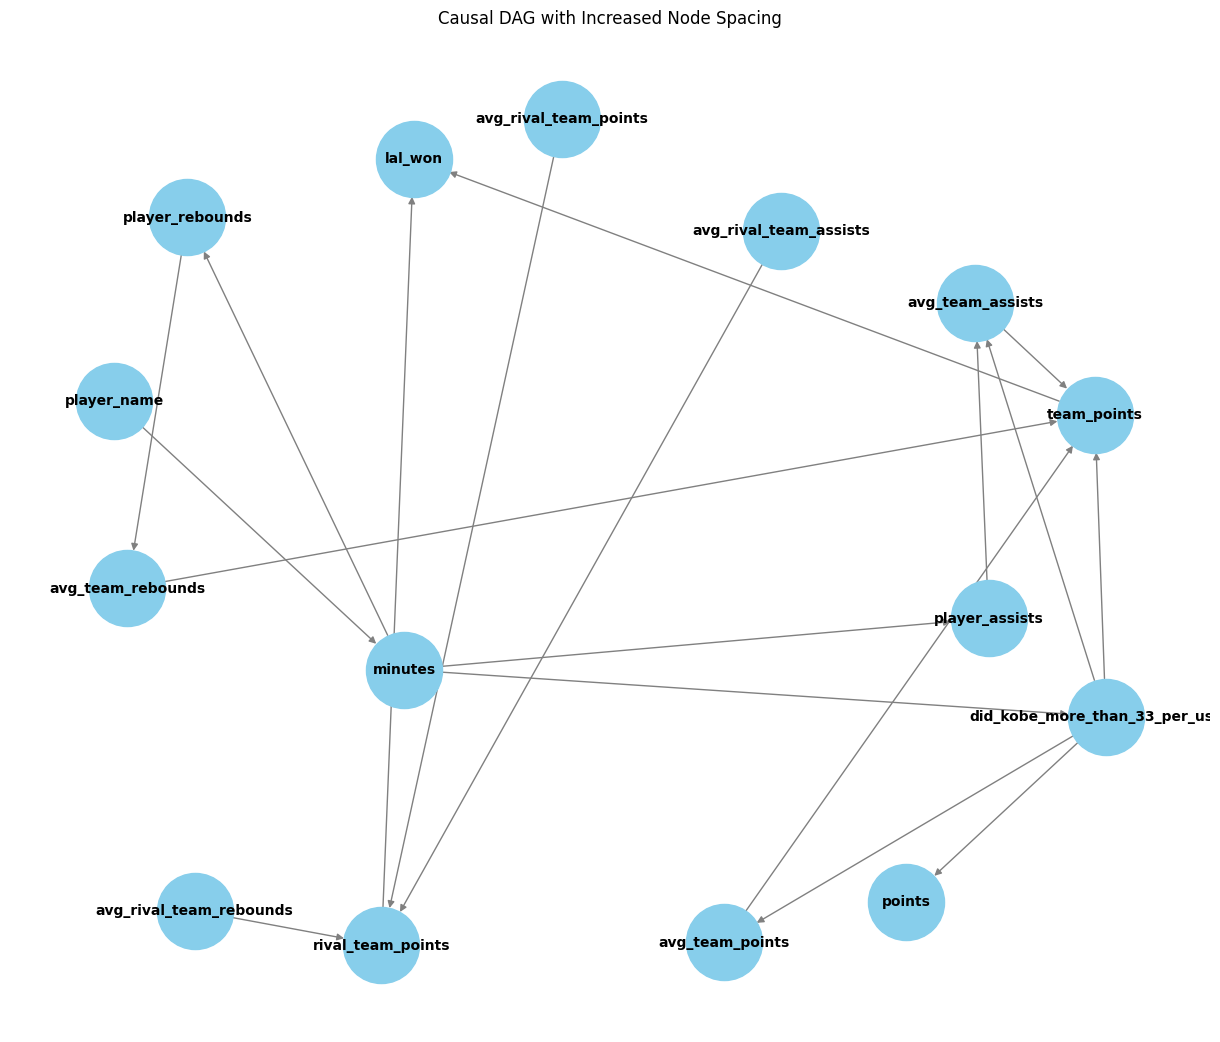

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "minutes"),
    ("minutes", "player_assists"),
    ("minutes", "did_kobe_more_than_33_per_usage"),
    ("minutes", "player_rebounds"),
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
    ("did_kobe_more_than_33_per_usage", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_33_per_usage", "avg_team_points"),
    ("did_kobe_more_than_33_per_usage", "avg_team_assists"),
    ("did_kobe_more_than_33_per_usage", "points"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
# Causal model

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_33_per_usage',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_33_per_usage, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment:  kobe_more_than_33_per_usage, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                d                                     
──────────────────────────────────(E[lal_won|minutes])
d[did_kobe_more_than_33_per_usage]                    
Estimand assumption 1, Unconfoundedness: If U→{did_kobe_more_than_33_per_usage} and U→lal_won then P(lal_won|did_kobe_more_than_33_per_usage,minutes,U) = P(lal_won|did_kobe_more_than_33_per_usage,minutes)

## Realized estimand
b: lal_won~did_kobe_more_than_33_per_usage+minutes
Target units: ate

## Estimate
Mean value: -0.17209856246473798
p-value: [0.00071334]

Treatment: kobe_more_than_33_per_usage, Outcome: lal_won, ATE: -0.17209856246473798


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:-0.17209856246473798
New effect:-0.1719249954369732
p value:0.92



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
#now for lower usage - 32

print(duplicated_games_scoring_usage.shape[0])

# Filter rows where player_name is "Kobe Bryant"
kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]

# Display the filtered dataset
print(kobe_bryant_data.head())

# Count the number of rows for Kobe Bryant
print(f"Number of rows for Kobe Bryant: {kobe_bryant_data.shape[0]}")
kobe_bryant_data.to_csv("kobe_bryant_data.csv", index=False)

# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_33_per_usage'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['usage'] >= 32 else 0,
    axis=1
)

# View the updated dataset
print(kobe_bryant_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_33_per_usage'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
print(kobe_bryant_data.head())
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name"
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())

# Causal model

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_33_per_usage',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_33_per_usage, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment:  kobe_more_than_33_per_usage, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

<ipython-input-189-e798aadcca94>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data['did_kobe_more_than_33_per_usage'] = kobe_bryant_data.apply(
<ipython-input-189-e798aadcca94>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data["lal_won"] = (
/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
 

529236
       game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
1212  2012-11-11    33.50      20          281        6         6         LAL   
1221  2012-11-30    37.17      14          281        8         2         LAL   
1226  2012-12-28    30.67      27          281        4         5         LAL   
1247  2013-03-22    37.88      21          281       11         4         WAS   
2459  2011-12-29    33.72      28          281        6         4         LAL   

     season_name  player_name player_team  ...  rival_team_name  team_points  \
1212     2012-13  Kobe Bryant         LAL  ...              SAC          103   
1221     2012-13  Kobe Bryant         LAL  ...              DEN          122   
1226     2012-13  Kobe Bryant         LAL  ...              POR          104   
1247     2012-13  Kobe Bryant         LAL  ...              WAS          100   
2459     2011-12  Kobe Bryant         LAL  ...              NYK           99   

      rival_team_points  

AttributeError: 'CausalEstimate' object has no attribute 'estimator'

In [ ]:
# Query 3 - Kobe's Points

kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]
# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_30_points'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['points'] >= 30 else 0,
    axis=1
)

# View the updated dataset
print(kobe_bryant_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_30_points'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
print(kobe_bryant_data.head())
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())



       game_date  minutes  points  player_id_x  assists  rebounds winner_team  \
1212  2012-11-11    33.50      20          281        6         6         LAL   
1221  2012-11-30    37.17      14          281        8         2         LAL   
1226  2012-12-28    30.67      27          281        4         5         LAL   
1247  2013-03-22    37.88      21          281       11         4         WAS   
2459  2011-12-29    33.72      28          281        6         4         LAL   

     season_name  player_name player_team  ...  team_points  \
1212     2012-13  Kobe Bryant         LAL  ...          103   
1221     2012-13  Kobe Bryant         LAL  ...          122   
1226     2012-13  Kobe Bryant         LAL  ...          104   
1247     2012-13  Kobe Bryant         LAL  ...          100   
2459     2011-12  Kobe Bryant         LAL  ...           99   

      rival_team_points  rival_player_team  avg_rival_team_points  \
1212                 90                SAC               7.366667

<ipython-input-200-54b621e96e70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data['did_kobe_more_than_30_points'] = kobe_bryant_data.apply(
<ipython-input-200-54b621e96e70>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_bryant_data["lal_won"] = (


Is Directed Acyclic Graph (DAG): True


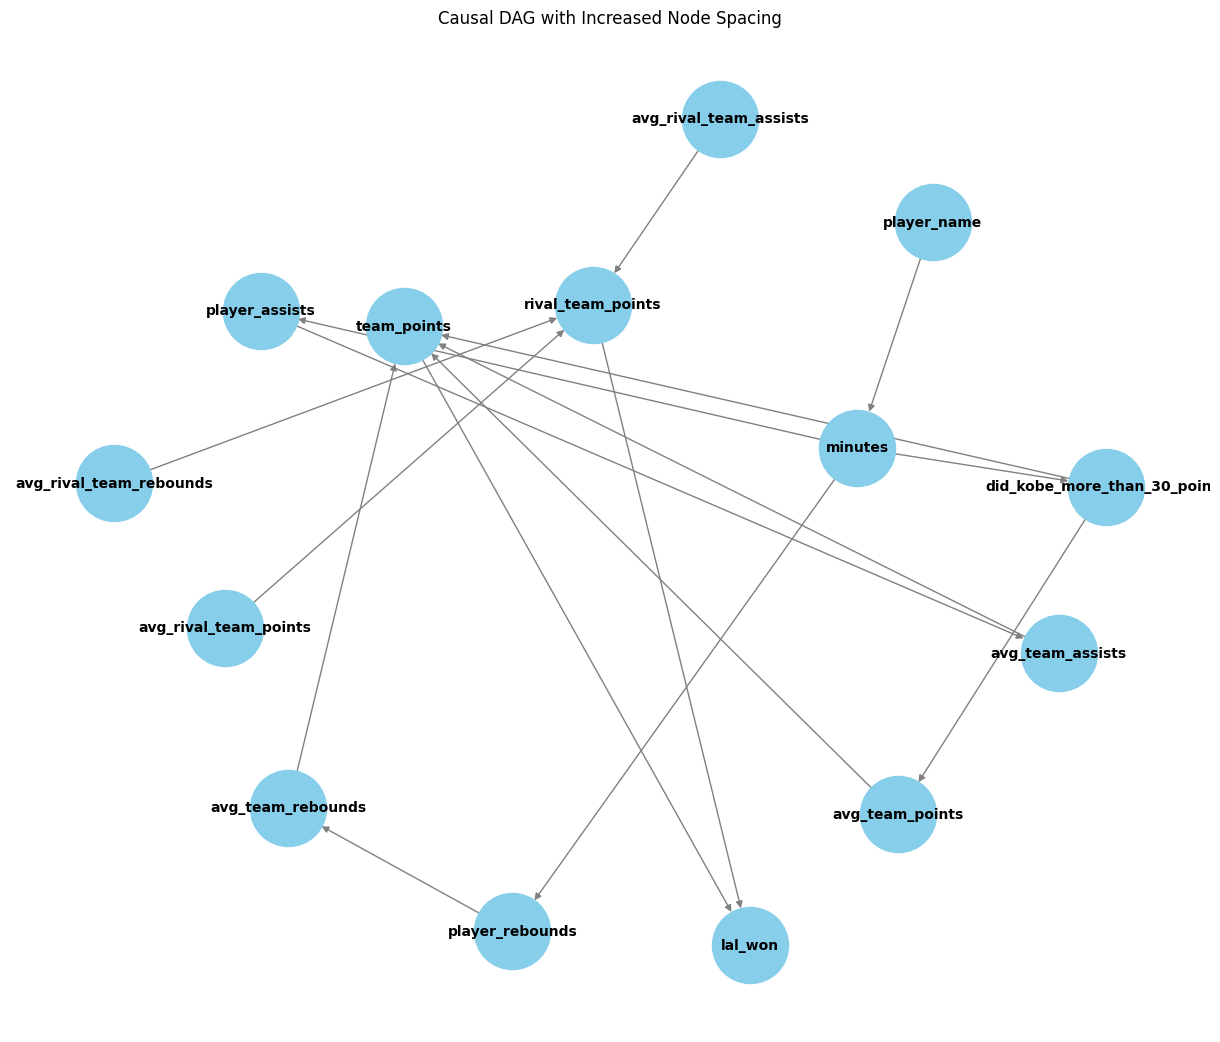

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "minutes"),
    ("minutes", "player_assists"),
    ("minutes", "did_kobe_more_than_30_points"),
    ("minutes", "player_rebounds"),
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
    ("did_kobe_more_than_30_points", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_30_points", "avg_team_points"),

]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_30_points',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                                                            
───────────────────────────────(E[lal_⟨won|⟩_team_⟨assists,⟩_team_rebounds])
d[did_kobe_more_than_30_points]                                             
Estimand assumption 1, Unconfoundedness: If U→{did_kobe_more_than_30_points} and U→lal_won then P(lal_won|did_kobe_more_than_30_points,avg_team_assists,avg_team_rebounds,U) = P(lal_won|did_kobe_more_than_30_points,avg_team_assists,avg_team_rebounds)

## Realized estimand
b: lal_won~did_kobe_more_than_30_points+avg_team_assists+avg_team_rebounds
Target units: ate

## Estimate
Mean value: 0.0741561824876058
p-value: [0.03206079]

Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: 0.0741561824876058


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:0.0741561824876058
New effect:0.07420316740326018
p value:0.8200000000000001



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
# Query 4 - Chris Paul assists
import pandas as pd

duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")

duplicated_games_scoring_usage = pd.merge(
    duplicated_games_scoring_rivals,
    filtered_dataset,
    on=["game_date", "player_name"],  # Merge on both columns
    how="inner"  # Use inner join to include only matching rows
)

# View the merged dataset
print(duplicated_games_scoring_usage.head())

In [ ]:
chris_paul_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Chris Paul"]
print(chris_paul_data)

chris_paul_data.to_csv("Query 3 - Kobe 30+ Points_data.csv", index=False)

# Add a column to indicate if Steph Curry scored more than 23 points
chris_paul_data['did_cp3_more_than_13_assists'] = chris_paul_data.apply(
    lambda row: 1 if row['player_name'] == 'Chris Paul' and row['assists'] >= 13 else 0,
    axis=1
)

# View the updated dataset
print(chris_paul_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = chris_paul_data['did_cp3_more_than_13_assists'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
chris_paul_data["team_won"] = (
    chris_paul_data["winner_team"] == chris_paul_data["player_team"]
).astype(int)
print(chris_paul_data.head())
column_counts = chris_paul_data['team_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
chris_paul_data = chris_paul_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(chris_paul_data.head())


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_data = [
    ("team_name", "team_points"),
    ("rival_team_name", "rival_team_points"),
    ("rival_team_points", "team_won"),
    ("team_points", "team_won"),
    ("avg_team_minutes", "did_cp3_more_than_13_assists"),
    ("avg_team_minutes", "avg_team_points"),         # More minutes played may lead to more points
    ("avg_team_minutes", "avg_team_rebounds"),
    ("avg_team_minutes", "avg_team_assists"),
    ("avg_rival_team_minutes", "avg_rival_team_points"),         # More minutes played may lead to more points
    ("avg_rival_team_minutes", "avg_rival_team_rebounds"),
    ("avg_rival_team_minutes", "avg_rival_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_cp3_more_than_13_assists", "team_points"),     # Points scored influence the winner
    ("did_cp3_more_than_13_assists", "avg_team_assists"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=chris_paul_data,
    treatment='did_cp3_more_than_13_assists',
    outcome='team_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# After Third Meeting
# recreating the DAG


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# DAG data
dag_data = [
    ("player_name", "player_points"),
    ("player_name", "player_assists"),
    ("player_name", "player_rebounds"),
    ("rival_team_points", "winner_team"),
    ("team_points", "winner_team"),
    ("player_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
# Rename columns directly in the DataFrame
duplicated_games_scoring_rivals.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
    if column in ['points', 'assists', 'rebounds'] else column
    for column in duplicated_games_scoring_rivals.columns
]

# Verify updated column names
print(duplicated_games_scoring_rivals.columns)

In [ ]:
steph_curry_data = duplicated_games_scoring_rivals[duplicated_games_scoring_rivals['player_name'] == "Stephen Curry"]

# View the filtered dataset

# Filter out rows where minutes equals 0
steph_curry_data = steph_curry_data[steph_curry_data['minutes'] != 0]

# View the filtered dataset
print(steph_curry_data.head())
print(f"Number of rows after filtering: {steph_curry_data.shape[0]}")
# Add a column to indicate if Steph Curry scored more than 23 points
steph_curry_data['did_steph_scored_more_than_23_points'] = steph_curry_data.apply(
    lambda row: 1 if row['player_name'] == 'Stephen Curry' and row['player_points'] >= 23 else 0,
    axis=1
)

# View the updated dataset
# Replace 'column_name' with the name of the column you want to analyze
column_counts = steph_curry_data['did_steph_scored_more_than_23_points'].value_counts()

# Print the counts
print(column_counts)
# Create a new column 'gsw_won' indicating if GSW won the game
steph_curry_data["gsw_won"] = (
    steph_curry_data["winner_team"] == "GSW"
).astype(int)
column_counts = steph_curry_data['gsw_won'].value_counts()
# Print the counts
columns_to_remove = [
    "winner_team","minutes", "player_id", "avg_rival_team_minutes"
    "season_name", "player_team", "avg_team_minutes"
]
steph_curry_data = steph_curry_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(steph_curry_data.head())
print(steph_curry_data.columns)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# DAG data
dag_data = [
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("player_name", "did_steph_scored_more_than_23_points"),
    ("player_name", "player_assists"),
    ("player_name", "player_rebounds"),
    ("player_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_steph_scored_more_than_23_points", "team_points"),     # Points scored influence the winner
    ("did_steph_scored_more_than_23_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with increased sparsity
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k to make the nodes more sparse
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

In [ ]:
# Causal model
model = CausalModel(
    data=steph_curry_data,
    treatment='did_steph_scored_more_than_23_points',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
print(duplicated_games_scoring_usage.shape[0])

# Filter rows where player_name is "Kobe Bryant"
kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]

# Display the filtered dataset

# Count the number of rows for Kobe Bryant
print(f"Number of rows for Kobe Bryant: {kobe_bryant_data.shape[0]}")
kobe_bryant_data.to_csv("kobe_bryant_data.csv", index=False)
# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_33_per_usage'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['usage'] >= 33 else 0,
    axis=1
)

# View the updated dataset
# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_33_per_usage'].value_counts()

# Print the counts
# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
columns_to_remove = [
    "winner_team","minutes", "player_id_y","player_id_x", "avg_rival_team_minutes"
    "season_name", "player_team", "avg_team_minutes", "rival_player_team", ""
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

# Rename columns directly in the DataFrame
kobe_bryant_data.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
    if column in ['points', 'assists', 'rebounds'] else column
    for column in kobe_bryant_data.columns
]

# Verify updated column names
print(kobe_bryant_data.columns)

# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "did_kobe_more_than_33_per_usage"),
    ("player_name", "player_assists"),
    ("player_name", "player_rebounds"),
    ("player_name", "player_points"),
    ("player_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_kobe_more_than_33_per_usage", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_33_per_usage", "avg_team_points"),
    ("did_kobe_more_than_33_per_usage", "avg_team_assists"),
    ("did_kobe_more_than_33_per_usage", "player_points"),
    ("did_kobe_more_than_33_per_usage", "player_assists"),
    ("did_kobe_more_than_33_per_usage", "player_rebounds"),
    ("player_points", "avg_team_points"),
    ("player_points", "team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
# Causal model

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_33_per_usage',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_33_per_usage, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment:  kobe_more_than_33_per_usage, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
print(duplicated_games_scoring_usage.shape[0])

# Filter rows where player_name is "Kobe Bryant"
kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]

# Display the filtered dataset

# Count the number of rows for Kobe Bryant
print(f"Number of rows for Kobe Bryant: {kobe_bryant_data.shape[0]}")
kobe_bryant_data.to_csv("kobe_bryant_data.csv", index=False)
# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_40_per_usage'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['usage'] >= 40 else 0,
    axis=1
)

# View the updated dataset
# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_40_per_usage'].value_counts()

# Print the counts
# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
columns_to_remove = [
    "winner_team","minutes", "player_id_y","player_id_x", "avg_rival_team_minutes"
    "season_name", "player_team", "avg_team_minutes", "rival_player_team", ""
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

# Rename columns directly in the DataFrame
kobe_bryant_data.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
    if column in ['points', 'assists', 'rebounds'] else column
    for column in kobe_bryant_data.columns
]

# Verify updated column names
print(kobe_bryant_data.columns)

# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "did_kobe_more_than_40_per_usage"),
    ("player_name", "player_assists"),
    ("player_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("player_name", "player_rebounds"),
    ("player_name", "player_points"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_kobe_more_than_40_per_usage", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_40_per_usage", "avg_team_points"),
    ("did_kobe_more_than_40_per_usage", "avg_team_assists"),
    ("did_kobe_more_than_40_per_usage", "player_points"),
    ("did_kobe_more_than_40_per_usage", "player_assists"),
    ("did_kobe_more_than_40_per_usage", "player_rebounds"),
    ("player_points", "avg_team_points"),
    ("player_points", "team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]
# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
# Causal model

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_40_per_usage',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_33_per_usage, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment:  kobe_more_than_33_per_usage, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Query 3 - Kobe's Points

kobe_bryant_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Kobe Bryant"]
# Add a column to indicate if Steph Curry scored more than 23 points
kobe_bryant_data['did_kobe_more_than_30_points'] = kobe_bryant_data.apply(
    lambda row: 1 if row['player_name'] == 'Kobe Bryant' and row['points'] >= 30 else 0,
    axis=1
)

# View the updated dataset
print(kobe_bryant_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = kobe_bryant_data['did_kobe_more_than_30_points'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
kobe_bryant_data["lal_won"] = (
    kobe_bryant_data["winner_team"] == "LAL"
).astype(int)
print(kobe_bryant_data.head())
column_counts = kobe_bryant_data['lal_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
kobe_bryant_data = kobe_bryant_data.drop(columns=columns_to_remove, errors="ignore")

kobe_bryant_data.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
    if column in ['points', 'assists', 'rebounds'] else column
    for column in kobe_bryant_data.columns
]
# View the updated DataFrame with new average columns
print(kobe_bryant_data.head())

In [ ]:
dag_data = [
    ("rival_team_points", "lal_won"),
    ("team_points", "lal_won"),
    ("player_name", "did_kobe_more_than_30_points"),
    ("player_name", "player_assists"),
    ("player_name", "player_rebounds"),
    ("player_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_kobe_more_than_30_points", "team_points"),     # Points scored influence the winner
    ("did_kobe_more_than_30_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()


In [ ]:
"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kobe_bryant_data,
    treatment='did_kobe_more_than_30_points',
    outcome='lal_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
chris_paul_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Chris Paul"]
print(chris_paul_data)

chris_paul_data.to_csv("Query 4 - Chris 13+ assists_data.csv", index=False)

# Add a column to indicate if Steph Curry scored more than 23 points
chris_paul_data['did_cp3_more_than_13_assists'] = chris_paul_data.apply(
    lambda row: 1 if row['player_name'] == 'Chris Paul' and row['assists'] >= 13 else 0,
    axis=1
)

# View the updated dataset
print(chris_paul_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = chris_paul_data['did_cp3_more_than_13_assists'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
chris_paul_data["team_won"] = (
    chris_paul_data["winner_team"] == chris_paul_data["player_team"]
).astype(int)
print(chris_paul_data.head())
column_counts = chris_paul_data['team_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
chris_paul_data = chris_paul_data.drop(columns=columns_to_remove, errors="ignore")
chris_paul_data.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
    if column in ['points', 'assists', 'rebounds'] else column
    for column in chris_paul_data.columns
]
# View the updated DataFrame with new average columns
print(chris_paul_data.head())


In [ ]:
dag_data = [
    ("rival_team_points", "team_won"),
    ("team_points", "team_won"),
    ("player_name", "player_points"),
    ("player_name", "did_cp3_more_than_13_assists"),
    ("player_name", "player_rebounds"),
    ("did_cp3_more_than_13_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_cp3_more_than_13_assists", "team_points"),     # Points scored influence the winner
    ("player_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()

In [ ]:
"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=chris_paul_data,
    treatment='did_cp3_more_than_13_assists',
    outcome='team_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
#After Third Meeting - Two player Queries

In [ ]:
import pandas as pd

duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")
print(duplicated_games_scoring_rivals.head())
print(duplicated_games_scoring_rivals.columns)
print(duplicated_games_scoring_rivals.shape[0])

In [ ]:
#Steph and kley dataset
steph_kley_data = duplicated_games_scoring_rivals[
    duplicated_games_scoring_rivals['player_name'].isin(["Stephen Curry", "Klay Thompson"])
]

# Display the first few rows to verify
print(steph_kley_data.head())
print(steph_kley_data.shape[0])
steph_kley_data.to_csv("steph_kley_data.csv", index=False)

In [ ]:
steph_kley_data_cleaned = steph_kley_data.drop_duplicates(subset=["game_date", "player_name"])
print(steph_kley_data_cleaned.shape[0])


In [ ]:
# Filter games where both Stephen Curry and Klay Thompson played
games_both_played_steph_kley = steph_kley_data_cleaned.groupby('game_date').filter(
    lambda x: set(["Stephen Curry", "Klay Thompson"]).issubset(set(x['player_name']))
)
print(games_both_played_steph_kley.head())
print(games_both_played_steph_kley.shape[0])

games_both_played_steph_kley.to_csv("games_both_played_steph_kley.csv", index=False)

# List of columns to remove
columns_to_remove = [
    "player_id", "season_name"
]

# Drop the specified columns
games_both_played_steph_kley = games_both_played_steph_kley.drop(columns=columns_to_remove, errors="ignore")
print(games_both_played_steph_kley.columns)
# Display the cleaned DataFrame

In [ ]:

# Rename player-specific columns dynamically
for stat in ['points', 'rebounds', 'assists', 'minutes']:
    games_both_played_steph_kley.rename(
        columns={stat: f"player_1_{stat}" if "Stephen Curry" in games_both_played_steph_kley['player_name'].values
                 else f"player_2_{stat}"}, inplace=True
    )

# Save the updated dataset
games_both_played_steph_kley.to_csv('renamed_games_both_played_steph_kley.csv', index=False)

# Display the updated DataFrame
print(games_both_played_steph_kley.head())
print(games_both_played_steph_kley.columns)
print(games_both_played_steph_kley.shape[0])
data = games_both_played_steph_kley


In [ ]:
# Filter the dataset for Klay Thompson and Stephen Curry
klay_data = data[data['player_name'] == 'Klay Thompson']
steph_data = data[data['player_name'] == 'Stephen Curry']

klay_data = klay_data.rename(
    columns={
        "player_1_minutes": "player_2_minutes",
        "player_1_points": "player_2_points",
        "player_1_assists": "player_2_assists",
        "player_1_rebounds": "player_2_rebounds",
        "player_name": "player_name_2"
    }
)


print(steph_data.shape[0])
print(klay_data.head())
print(klay_data.columns)
print(klay_data.shape[0])

In [ ]:
# Select only the required columns from Klay's dataset
klay_subset = klay_data[
    ["game_date", "player_2_minutes", "player_2_points", "player_2_assists", "player_2_rebounds", "player_name_2"]
]

print(klay_subset.head())
print(klay_subset.columns)
print(klay_subset.shape[0])

klay_subset.to_csv("klay_subset.csv", index=False)


# Merge Curry's dataset with the selected columns from Klay's dataset on 'game_date'
merged_data = pd.merge(steph_data, klay_subset, on="game_date", how="left")
print(merged_data.head())
print(merged_data.columns)
print(merged_data.shape[0])
merged_data.to_csv("merged_data_steph_kleyy.csv", index=False)


In [ ]:
# Generic dual Dag
import networkx as nx
import matplotlib.pyplot as plt
# DAG data
dag_data = [
    ("player_name", "player_1_points"),
    ("player_name", "player_1_assists"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "player_2_points"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "winner_team"),
    ("team_points", "winner_team"),
    ("player_1_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("player_1_points", "team_points"),
    ("player_2_points", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
merged_data['steph_23+_kley_20+'] = ((merged_data['player_2_points'] >= 20) & (merged_data['player_1_points'] >= 23)).astype(int)
column_counts = merged_data['steph_23+_kley_20+'].value_counts()
# Print the counts
print(column_counts)

merged_data["gsw_won"] = (
    merged_data["winner_team"] == "GSW"
).astype(int)

merged_data.to_csv("merged_data_steph_kleyy_points.csv", index=False)


print(merged_data.head())

In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "steph_23+_kley_20+"),
    ("player_name", "player_1_assists"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "steph_23+_kley_20+"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_23+_kley_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_23+_kley_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()




In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_23+_kley_20+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# or steph or kley scored 25+ points

merged_data['steph_23+_or_kley_20+'] = ((merged_data['player_2_points'] >= 20) | (merged_data['player_1_points'] >= 23)).astype(int)
column_counts = merged_data['steph_23+_or_kley_20+'].value_counts()
# Print the counts
print(column_counts)


print(merged_data.head())
print(merged_data.columns)



In [ ]:
# List of columns to remove
columns_to_remove = [
    "player_1_minutes", "player_1_points", "fg_two_pct", "avg_team_minutes", 'avg_rival_team_minutes', 'player_2_minutes', 'player_2_points',
       'player_2_minutes', "player_2_points", "steph_23+_kley_20+", "steph_25+_kley_20+",
]

# Drop the specified columns
merged_data = merged_data.drop(columns=columns_to_remove, errors="ignore")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(merged_data.head())


In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "steph_23+_or_kley_20+"),
    ("player_name", "player_1_assists"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "steph_23+_or_kley_20+"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_23+_or_kley_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_23+_or_kley_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()



In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_23+_or_kley_20+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
#Durent and Westbrook dataset
Durent_Westbrook_data = duplicated_games_scoring_rivals[
    duplicated_games_scoring_rivals['player_name'].isin(["Kevin Durant", "Russell Westbrook"])
]

# Display the first few rows to verify
Durent_Westbrook_data = Durent_Westbrook_data.drop_duplicates(subset=["game_date", "player_name"])


# Filter games where both Stephen Curry and Klay Thompson played
Durent_Westbrook_data = Durent_Westbrook_data.groupby('game_date').filter(
    lambda x: set(["Kevin Durant", "Russell Westbrook"]).issubset(set(x['player_name']))
)

# List of columns to remove
columns_to_remove = [
    "player_id", "season_name"
]

# Drop the specified columns
Durent_Westbrook_data = Durent_Westbrook_data.drop(columns=columns_to_remove, errors="ignore")
# Display the cleaned DataFrame

# Rename player-specific columns dynamically
for stat in ['points', 'rebounds', 'assists', 'minutes']:
    Durent_Westbrook_data.rename(
        columns={stat: f"player_1_{stat}" if "Russell Westbrook" in Durent_Westbrook_data['player_name'].values
                 else f"player_2_{stat}"}, inplace=True
    )

# Display the updated DataFrame

data = Durent_Westbrook_data
print(data.columns)
# Filter the dataset for Klay Thompson and Stephen Curry
durent_data = data[data['player_name'] == 'Kevin Durant']
westbrook_data = data[data['player_name'] == 'Russell Westbrook']
print(data.shape[0])

durent_data = durent_data.rename(
    columns={
        "player_1_minutes": "player_2_minutes",
        "player_1_points": "player_2_points",
        "player_1_assists": "player_2_assists",
        "player_1_rebounds": "player_2_rebounds",
        "player_name": "player_name_2"
    }
)


# Select only the required columns from Klay's dataset
durent_subset = durent_data[
    ["game_date", "player_2_minutes", "player_2_points", "player_2_assists", "player_2_rebounds", "player_name_2"]
]

print(durent_subset.head())
print(durent_subset.columns)
print(durent_subset.shape[0])



# Merge Curry's dataset with the selected columns from Klay's dataset on 'game_date'
merged_data = pd.merge(westbrook_data, durent_subset, on="game_date", how="left")
print(merged_data.head())
print(merged_data.columns)
print(merged_data.shape[0])
merged_data.to_csv("merged_data_westbrook_durent.csv", index=False)

In [ ]:
merged_data['durant_23+_westbrook_20+'] = ((merged_data['player_2_points'] > 25) & (merged_data['player_1_points'] > 20)).astype(int)
column_counts = merged_data['durant_23+_westbrook_20+'].value_counts()
# Print the counts
print(column_counts)

merged_data["okc_won"] = (
    merged_data["winner_team"] == "OKC"
).astype(int)

merged_data['durant_23+_or_westbrook_20+'] = ((merged_data['player_2_points'] > 25) | (merged_data['player_1_points'] > 20)).astype(int)
column_counts = merged_data['durant_23+_or_westbrook_20+'].value_counts()
# Print the counts
print(column_counts)

merged_data.to_csv("merged_data_westbrook_durent_points.csv", index=False)



# List of columns to remove
columns_to_remove = [
    "player_1_minutes", "player_1_points", "fg_two_pct", "avg_team_minutes", 'avg_rival_team_minutes', 'player_2_minutes', 'player_2_points',
       'player_2_minutes', "player_2_points",
]

# Drop the specified columns
merged_data = merged_data.drop(columns=columns_to_remove, errors="ignore")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")

merged_data_1 = merged_data.copy()
merged_data_2 = merged_data.copy()
merged_data_1 = merged_data.drop(columns=['durant_23+_or_westbrook_20+'], errors="ignore")
merged_data_2 = merged_data.drop(columns=['durant_23+_westbrook_20+'], errors="ignore")
merged_data_2.head()


In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "durant_23+_westbrook_20+"),
    ("player_name", "player_1_assists"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "durant_23+_westbrook_20+"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "okc_won"),
    ("team_points", "okc_won"),
    ("durant_23+_westbrook_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("durant_23+_westbrook_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data_1,
    treatment='durant_23+_westbrook_20+',
    outcome='okc_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "durant_23+_or_westbrook_20+"),
    ("player_name", "player_1_assists"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "durant_23+_or_westbrook_20+"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "okc_won"),
    ("team_points", "okc_won"),
    ("durant_23+_or_westbrook_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("durant_23+_or_westbrook_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data_2,
    treatment="durant_23+_or_westbrook_20+",
    outcome='okc_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

    game_date  minutes  points  player_id  assists  rebounds winner_team  \
0  2012-11-12     0.52       0        201        0         0         MIA   
1  2012-11-21    42.42      28        359        3         4         HOU   
2  2012-11-21    26.12       4        368        3         4         HOU   
3  2012-11-23    17.32      11         61        1         2         HOU   
4  2012-11-27    41.50      18         57        5         7         HOU   

  season_name       player_name player_team  ...  avg_team_minutes  team_name  \
0     2012-13    Terrence Jones         HOU  ...         26.667778        HOU   
1     2012-13      James Harden         HOU  ...         29.519091        HOU   
2     2012-13        Jeremy Lin         HOU  ...         29.519091        HOU   
3     2012-13     Toney Douglas         HOU  ...         23.941667        HOU   
4     2012-13  Chandler Parsons         HOU  ...         22.520769        HOU   

   rival_team_name  team_points rival_team_points rival_

<ipython-input-203-47db0de9c463>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  westbrook_data['did_westbrook_more_than_25_points'] = westbrook_data.apply(
<ipython-input-203-47db0de9c463>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  westbrook_data["okc_won"] = (


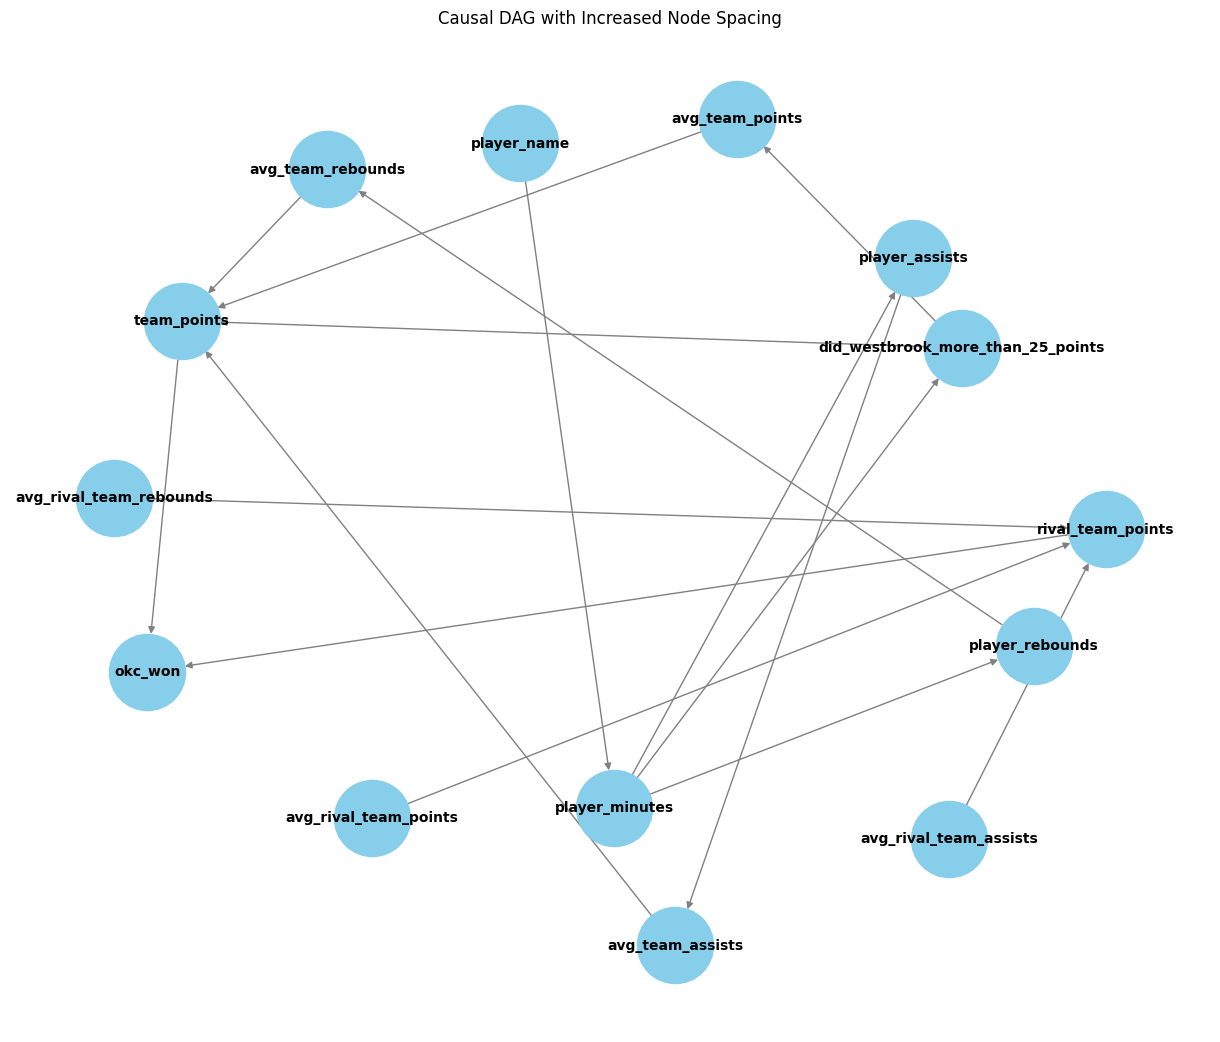

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                 d                                                               
────────────────────────────────────(E[okc_⟨won|⟩_team_⟨assists,⟩_team_rebounds])
d[did_westbrook_more_than_25_points]                                             
Estimand assumption 1, Unconfoundedness: If U→{did_westbrook_more_than_25_points} and U→okc_won then P(okc_won|did_westbrook_more_than_25_points,avg_team_assists,avg_team_rebounds,U) = P(okc_won|did_westbrook_more_than_25_points,avg_team_assists,avg_team_rebounds)

## Realized estimand
b: okc_won~did_westbrook_more_than_25_points+avg_team_assists+avg_team_rebounds
Target units: ate

## Estimate
Mean value: -0.01738320217498479
p-value: [0.50330585]

Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: [0.50330585]


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
# Query 5 - Westbrook's Points
import pandas as pd

duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")
print(duplicated_games_scoring_rivals.head())
print(duplicated_games_scoring_rivals.columns)
print(duplicated_games_scoring_rivals.shape[0])


westbrook_data = duplicated_games_scoring_rivals[duplicated_games_scoring_rivals['player_name'] == "Russell Westbrook"]
# Add a column to indicate if Steph Curry scored more than 25 points
westbrook_data['did_westbrook_more_than_25_points'] = westbrook_data.apply(
    lambda row: 1 if row['player_name'] == 'Russell Westbrook' and row['points'] >= 20 else 0,
    axis=1
)

# View the updated dataset
print(westbrook_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = westbrook_data['did_westbrook_more_than_25_points'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
westbrook_data["okc_won"] = (
    westbrook_data["winner_team"] == "OKC"
).astype(int)
print(westbrook_data.head())
column_counts = westbrook_data["okc_won"].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
westbrook_data = westbrook_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(westbrook_data.head())

dag_data = [
    ("rival_team_points", "okc_won"),
    ("team_points", "okc_won"),
    ("player_name", "player_minutes"),
    ("player_minutes", "did_westbrook_more_than_25_points"),
    ("player_minutes", "player_assists"),
    ("player_minutes", "player_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("player_rebounds", "avg_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_westbrook_more_than_25_points", "team_points"),     # Points scored influence the winner
    ("did_westbrook_more_than_25_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()


"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=westbrook_data,
    treatment='did_westbrook_more_than_25_points',
    outcome='okc_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)

    game_date  minutes  points  player_id  assists  rebounds winner_team  \
0  2012-11-12     0.52       0        201        0         0         MIA   
1  2012-11-21    42.42      28        359        3         4         HOU   
2  2012-11-21    26.12       4        368        3         4         HOU   
3  2012-11-23    17.32      11         61        1         2         HOU   
4  2012-11-27    41.50      18         57        5         7         HOU   

  season_name       player_name player_team  ...  avg_team_minutes  team_name  \
0     2012-13    Terrence Jones         HOU  ...         26.667778        HOU   
1     2012-13      James Harden         HOU  ...         29.519091        HOU   
2     2012-13        Jeremy Lin         HOU  ...         29.519091        HOU   
3     2012-13     Toney Douglas         HOU  ...         23.941667        HOU   
4     2012-13  Chandler Parsons         HOU  ...         22.520769        HOU   

   rival_team_name  team_points rival_team_points rival_

<ipython-input-204-8e4d4f45932b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kd_data['did_kd_more_than_25_points'] = kd_data.apply(
<ipython-input-204-8e4d4f45932b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kd_data["team_won"] = (


Is Directed Acyclic Graph (DAG): True


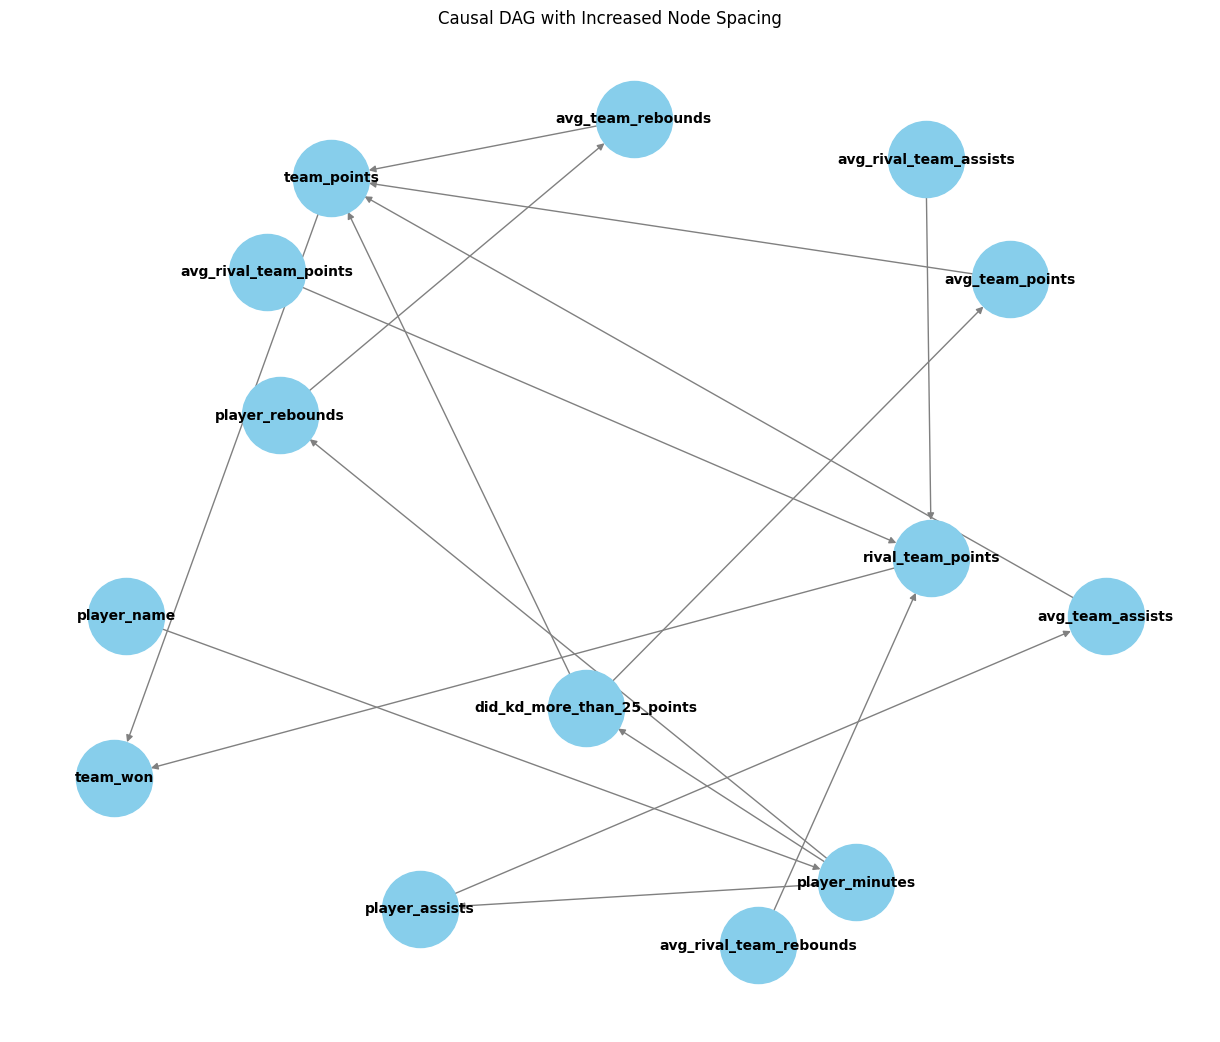

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 4 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                            
─────────────────────────────(E[team_⟨won|⟩_team_⟨assists,⟩_team_rebounds])
d[did_kd_more_than_25_points]                                              
Estimand assumption 1, Unconfoundedness: If U→{did_kd_more_than_25_points} and U→team_won then P(team_won|did_kd_more_than_25_points,avg_team_assists,avg_team_rebounds,U) = P(team_won|did_kd_more_than_25_points,avg_team_assists,avg_team_rebounds)

## Realized estimand
b: team_won~did_kd_more_than_25_points+avg_team_assists+avg_team_rebounds
Target units: ate

## Estimate
Mean value: -0.022862832242005027
p-value: [0.38136912]

Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: [0.38136912]


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
# Query 6 - Durent's Points
import pandas as pd

duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")
print(duplicated_games_scoring_rivals.head())
print(duplicated_games_scoring_rivals.columns)
print(duplicated_games_scoring_rivals.shape[0])


kd_data = duplicated_games_scoring_rivals[duplicated_games_scoring_rivals['player_name'] == "Kevin Durant"]
# Add a column to indicate if Steph Curry scored more than 25 points
kd_data['did_kd_more_than_25_points'] = kd_data.apply(
    lambda row: 1 if row['player_name'] == 'Kevin Durant' and row['points'] >= 25 else 0,
    axis=1
)

# View the updated dataset
print(kd_data.head())

# Replace 'column_name' with the name of the column you want to analyze
column_counts = kd_data['did_kd_more_than_25_points'].value_counts()

# Print the counts
print(column_counts)

# Create a new column 'gsw_won' indicating if GSW won the game
kd_data["team_won"] = (
    kd_data["winner_team"] == kd_data["player_team"]
).astype(int)
print(kd_data.head())
column_counts = kd_data["team_won"].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "assists", "rebounds","minutes", "player_id",
    "season_name", "player_team", "player_name", "usage", "player_id_x", "player_id_y"
]
kd_data = kd_data.drop(columns=columns_to_remove, errors="ignore")

# View the updated DataFrame with new average columns
print(kd_data.head())
kd_data.to_csv("kd_data.csv", index=False)

dag_data = [
    ("rival_team_points", "team_won"),
    ("team_points", "team_won"),
    ("player_name", "player_minutes"),
    ("player_minutes", "did_kd_more_than_25_points"),
    ("player_minutes", "player_assists"),
    ("player_minutes", "player_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("player_rebounds", "avg_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_kd_more_than_25_points", "team_points"),     # Points scored influence the winner
    ("did_kd_more_than_25_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Adjust the layout to make nodes farther apart
pos = nx.spring_layout(dag, k=2, iterations=50)  # Increased `k` for more spacing

# Draw the DAG
plt.figure(figsize=(12, 10))
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG with Increased Node Spacing")
plt.show()


"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=kd_data,
    treatment='did_kd_more_than_25_points',
    outcome='team_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: kobe_more_than_30_points, Outcome: lal_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)

In [ ]:
#Durent and Westbrook dataset
Durent_Westbrook_data = duplicated_games_scoring_rivals[
    duplicated_games_scoring_rivals['player_name'].isin(["Kevin Durant", "Russell Westbrook"])
]

# Display the first few rows to verify
Durent_Westbrook_data = Durent_Westbrook_data.drop_duplicates(subset=["game_date", "player_name"])


# Filter games where both Stephen Curry and Klay Thompson played
Durent_Westbrook_data = Durent_Westbrook_data.groupby('game_date').filter(
    lambda x: set(["Kevin Durant", "Russell Westbrook"]).issubset(set(x['player_name']))
)

# List of columns to remove
columns_to_remove = [
    "player_id", "season_name"
]

# Drop the specified columns
Durent_Westbrook_data = Durent_Westbrook_data.drop(columns=columns_to_remove, errors="ignore")
# Display the cleaned DataFrame

# Rename player-specific columns dynamically
for stat in ['points', 'rebounds', 'assists', 'minutes']:
    Durent_Westbrook_data.rename(
        columns={stat: f"player_1_{stat}" if "Russell Westbrook" in Durent_Westbrook_data['player_name'].values
                 else f"player_2_{stat}"}, inplace=True
    )

# Display the updated DataFrame

data = Durent_Westbrook_data
print(data.columns)
# Filter the dataset for Klay Thompson and Stephen Curry
durent_data = data[data['player_name'] == 'Kevin Durant']
westbrook_data = data[data['player_name'] == 'Russell Westbrook']
print(data.shape[0])

durent_data = durent_data.rename(
    columns={
        "player_1_minutes": "player_2_minutes",
        "player_1_points": "player_2_points",
        "player_1_assists": "player_2_assists",
        "player_1_rebounds": "player_2_rebounds",
        "player_name": "player_name_2"
    }
)


# Select only the required columns from Klay's dataset
durent_subset = durent_data[
    ["game_date", "player_2_minutes", "player_2_points", "player_2_assists", "player_2_rebounds", "player_name_2"]
]

print(durent_subset.head())
print(durent_subset.columns)
print(durent_subset.shape[0])



# Merge Curry's dataset with the selected columns from Klay's dataset on 'game_date'
merged_data = pd.merge(westbrook_data, durent_subset, on="game_date", how="left")
print(merged_data.head())
print(merged_data.columns)
print(merged_data.shape[0])

merged_data['durant_23+_westbrook_10+_ass'] = ((merged_data['player_2_points'] >= 23) & (merged_data['player_1_assists'] >= 10)).astype(int)
column_counts = merged_data['durant_23+_westbrook_10+_ass'].value_counts()
# Print the counts
print(column_counts)

merged_data["okc_won"] = (
    merged_data["winner_team"] == "OKC"
).astype(int)

merged_data['durant_23+_or_westbrook_10+_ass'] = ((merged_data['player_2_points'] >= 20) | (merged_data['player_1_assists'] >= 10)).astype(int)
column_counts = merged_data['durant_23+_or_westbrook_10+_ass'].value_counts()
# Print the counts
print(column_counts)



# List of columns to remove
columns_to_remove = [
    "player_1_minutes", "player_1_assists", "fg_two_pct", "avg_team_minutes", 'avg_rival_team_minutes', 'player_2_minutes', 'player_2_points',
       'player_2_minutes', "player_2_points",
]

# Drop the specified columns
merged_data = merged_data.drop(columns=columns_to_remove, errors="ignore")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")

merged_data_1 = merged_data.copy()
merged_data_2 = merged_data.copy()
merged_data_1 = merged_data.drop(columns=['durant_23+_or_westbrook_10+_ass'], errors="ignore")
merged_data_2 = merged_data.drop(columns=['durant_23+_westbrook_10+_ass'], errors="ignore")
merged_data_2.head()

Index(['game_date', 'player_1_minutes', 'player_1_points', 'player_1_assists',
       'player_1_rebounds', 'winner_team', 'player_name', 'player_team',
       'avg_team_points', 'avg_team_rebounds', 'avg_team_assists',
       'avg_team_minutes', 'team_name', 'rival_team_name', 'team_points',
       'rival_team_points', 'rival_player_team', 'avg_rival_team_points',
       'avg_rival_team_rebounds', 'avg_rival_team_assists',
       'avg_rival_team_minutes'],
      dtype='object')
1112
      game_date  player_2_minutes  player_2_points  player_2_assists  \
346  2012-12-12             43.87               35                 3   
356  2013-01-02             41.35               27                 5   
362  2013-02-04             28.47               19                 4   
368  2013-02-27             26.85               18                10   
369  2013-03-10             39.10               23                 4   

     player_2_rebounds player_name_2  
346                  9  Kevin Durant  
3

,game_date,player_1_points,player_1_rebounds,winner_team,player_name,player_team,avg_team_points,avg_team_rebounds,avg_team_assists,team_name,...,rival_team_points,rival_player_team,avg_rival_team_points,avg_rival_team_rebounds,avg_rival_team_assists,player_2_assists,player_2_rebounds,player_name_2,okc_won,durant_23+_or_westbrook_10+_ass
0,2012-11-18,30,2,OKC,Russell Westbrook,OKC,8.066667,2.733333,2.133333,OKC,...,109,GSW,9.428571,3.071429,2.428571,10,13,Kevin Durant,1,1
1,2012-11-26,12,2,OKC,Russell Westbrook,OKC,9.500000,4.500000,2.583333,OKC,...,69,CHA,9.500000,4.500000,2.583333,4,6,Kevin Durant,1,1
2,2012-12-07,33,1,OKC,Russell Westbrook,OKC,12.666667,4.000000,2.444444,OKC,...,108,LAL,12.666667,4.000000,2.444444,4,9,Kevin Durant,1,1
3,2012-12-27,16,6,OKC,Russell Westbrook,OKC,12.333333,6.222222,2.555556,OKC,...,105,DAL,13.000000,6.250000,2.500000,5,8,Kevin Durant,1,1
4,2012-12-31,24,7,OKC,Russell Westbrook,OKC,8.923077,3.538462,1.846154,OKC,...,96,PHX,9.500000,3.583333,1.916667,2,3,Kevin Durant,1,1


Is Directed Acyclic Graph (DAG): True


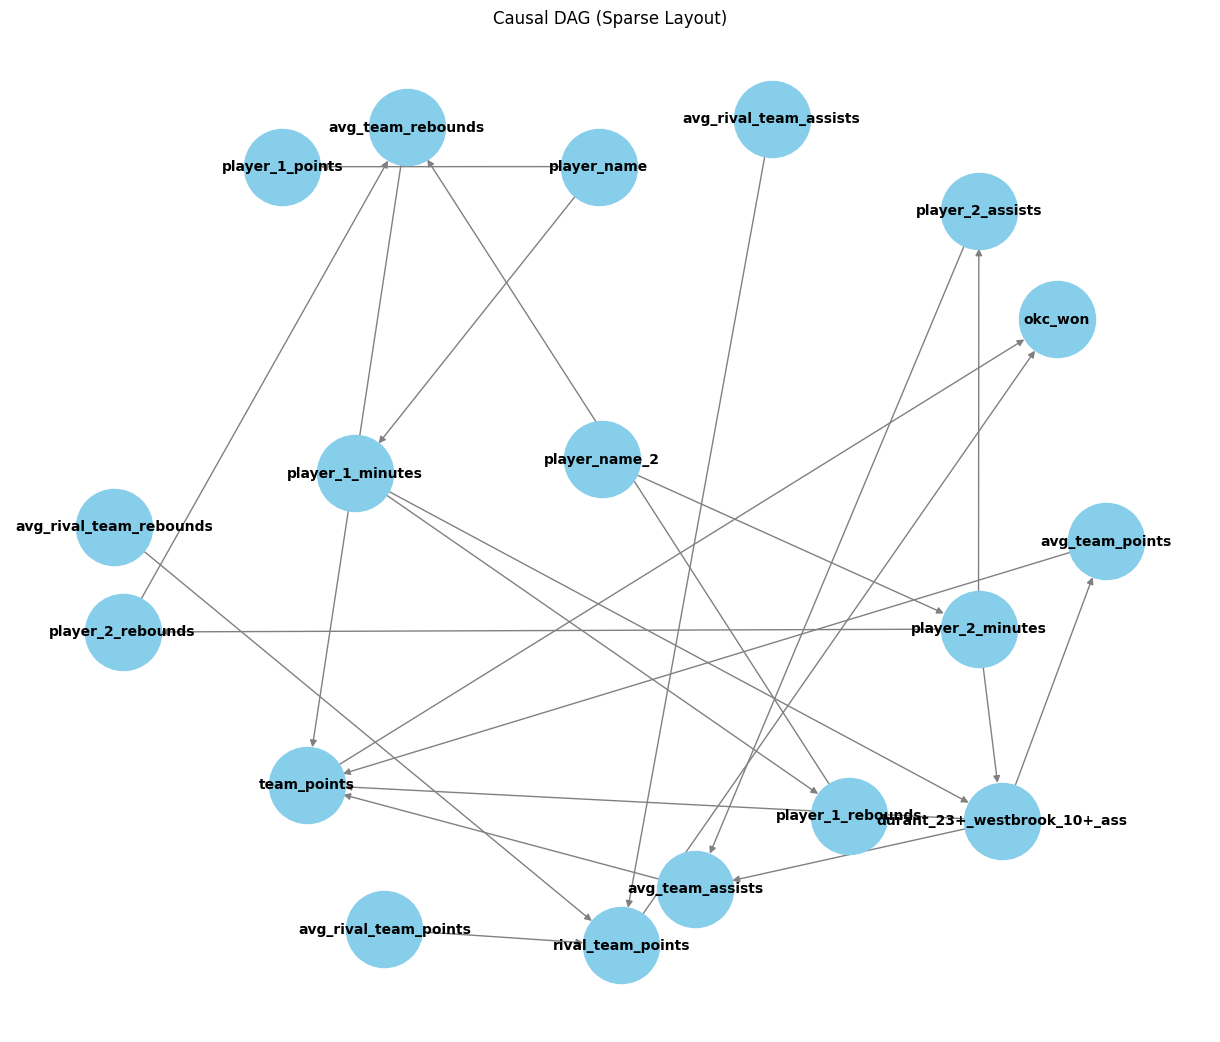

In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "player_1_points"),
    ("player_name_2", "player_2_minutes"),
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "durant_23+_westbrook_10+_ass"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_2_minutes", "durant_23+_westbrook_10+_ass"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "okc_won"),
    ("team_points", "okc_won"),
    ("durant_23+_westbrook_10+_ass", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("durant_23+_westbrook_10+_ass", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("durant_23+_westbrook_10+_ass", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data_1,
    treatment="durant_23+_westbrook_10+_ass",
    outcome='okc_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:583: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/loc

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                                                             
───────────────────────────────(E[okc_⟨won|⟩_team_rebounds,player_2_assists])
d[durant_23+_westbrook_10+_ass]                                              
Estimand assumption 1, Unconfoundedness: If U→{durant_23+_westbrook_10+_ass} and U→okc_won then P(okc_won|durant_23+_westbrook_10+_ass,avg_team_rebounds,player_2_assists,U) = P(okc_won|durant_23+_westbrook_10+_ass,avg_team_rebounds,player_2_assists)

## Realized estimand
b: okc_won~durant_23+_westbrook_10+_ass+avg_team_rebounds+player_2_assists
Target units: ate

## Estimate
Mean value: 0.09963864837072711
p-value: [0.02546625]

Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: 0.09963864837072711


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:0.09963864837072711
New effect:0.09966260181791144
p value:0.8799999999999999



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "player_1_points"),
    ("player_name", "durant_23+_or_westbrook_10+_ass"),
    ("player_name", "player_1_rebounds"),
    ("player_name_2", "durant_23+_or_westbrook_10+_ass"),
    ("player_name_2", "player_2_assists"),
    ("player_name_2", "player_2_rebounds"),
    ("rival_team_points", "okc_won"),
    ("team_points", "okc_won"),
    ("durant_23+_or_westbrook_10+_ass", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("durant_23+_or_westbrook_10+_ass", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("durant_23+_or_westbrook_10+_ass", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data_2,
    treatment="durant_23+_or_westbrook_10+_ass",
    outcome='okc_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# After Forth meeting - thing to redo
# change Causal Graph for Solo and due to include minues
# Minues Query + less points (try different values)
# Table for what can we do + what need changes in datasets + what need changes in DAG
# try one - away / home games

In [ ]:
# change Causal Graph for Solo and due to include minues
import matplotlib.pyplot as plt
import networkx as nx

# DAG data
dag_data = [
    ("player_name", "player_minutes"),
    ("player_minutes", "player_points"),
    ("player_minutes", "player_assists"),
    ("player_minutes", "player_rebounds"),
    ("rival_team_points", "winner_team"),
    ("team_points", "winner_team"),
    ("player_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_points", "team_points"),
    ("player_rebounds", "avg_team_rebounds"),
    ("player_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
import pandas as pd


duplicated_games_scoring_usage = pd.read_csv("_general_games_scoring_8.csv")


# View the merged dataset

chris_paul_data = duplicated_games_scoring_usage[duplicated_games_scoring_usage['player_name'] == "Chris Paul"]


chris_paul_data.to_csv("Query 4 - Chris 13+ assists_data.csv", index=False)

# Add a column to indicate if Steph Curry scored more than 23 points
chris_paul_data['did_cp3_more_than_13_assists'] = chris_paul_data.apply(
    lambda row: 1 if row['player_name'] == 'Chris Paul' and row['assists'] >= 13 else 0,
    axis=1
)

# View the updated dataset

# Replace 'column_name' with the name of the column you want to analyze
column_counts = chris_paul_data['did_cp3_more_than_13_assists'].value_counts()

# Print the counts

# Create a new column 'gsw_won' indicating if GSW won the game
chris_paul_data["team_won"] = (
    chris_paul_data["winner_team"] == chris_paul_data["player_team"]
).astype(int)
column_counts = chris_paul_data['team_won'].value_counts()
# Print the counts
print(column_counts)

columns_to_remove = [
    "winner_team", "player_id",
    "season_name", "player_team", "usage", "player_id_x", "player_id_y"
]
chris_paul_data = chris_paul_data.drop(columns=columns_to_remove, errors="ignore")
chris_paul_data.columns = [
    column.replace('points', 'player_points')
           .replace('assists', 'player_assists')
           .replace('rebounds', 'player_rebounds')
           .replace('minutes', 'player_minutes')
    if column in ['points', 'assists', 'rebounds', 'minutes'] else column
    for column in chris_paul_data.columns
]
# View the updated DataFrame with new average columns
print(chris_paul_data.columns)


In [ ]:
# change Causal Graph for Solo and due to include minues
import matplotlib.pyplot as plt
import networkx as nx

# DAG data
dag_data = [
    ("rival_team_points", "team_won"),
    ("team_points", "team_won"),
    ("player_name", "player_minutes"),
    ("player_minutes", "player_points"),
    ("player_minutes", "did_cp3_more_than_13_assists"),
    ("player_minutes", "player_rebounds"),
    ("player_name", "did_cp3_more_than_13_assists"),
    ("did_cp3_more_than_13_assists", "avg_rival_team_assists"),
    ("player_rebounds", "avg_rival_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("did_cp3_more_than_13_assists", "team_points"),     # Points scored influence the winner
    ("player_points", "avg_team_points"),
    ("avg_team_points", "team_points"),
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
!pip install dowhy

In [ ]:
def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

In [ ]:
"# Causal model"

import dowhy
from dowhy import CausalModel

model = CausalModel(
    data=chris_paul_data,
    treatment='did_cp3_more_than_13_assists',
    outcome='team_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: did_cp3_more_than_13_assists, Outcome: team_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Generic dual Dag
import networkx as nx
import matplotlib.pyplot as plt
# DAG data
dag_data = [
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "player_1_points"),
    ("player_1_minutes", "player_1_assists"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_name_2", "player_2_minutes"),
    ("player_2_minutes", "player_2_points"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "winner_team"),
    ("team_points", "winner_team"),
    ("player_1_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_points", "avg_team_points"),         # More minutes played may lead to more points
    ("player_2_rebounds", "avg_team_rebounds"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("player_1_points", "team_points"),
    ("player_2_points", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
duplicated_games_scoring_rivals = pd.read_csv("_general_games_scoring_8.csv")
steph_kley_data = duplicated_games_scoring_rivals[
    duplicated_games_scoring_rivals['player_name'].isin(["Stephen Curry", "Klay Thompson"])
]
steph_kley_data_cleaned = steph_kley_data.drop_duplicates(subset=["game_date", "player_name"])
games_both_played_steph_kley = steph_kley_data_cleaned.groupby('game_date').filter(
    lambda x: set(["Stephen Curry", "Klay Thompson"]).issubset(set(x['player_name']))
)
columns_to_remove = [
    "player_id", "season_name"
]

# Drop the specified columns
games_both_played_steph_kley = games_both_played_steph_kley.drop(columns=columns_to_remove, errors="ignore")

# Rename player-specific columns dynamically
for stat in ['points', 'rebounds', 'assists', 'minutes']:
    games_both_played_steph_kley.rename(
        columns={stat: f"player_1_{stat}" if "Stephen Curry" in games_both_played_steph_kley['player_name'].values
                 else f"player_2_{stat}"}, inplace=True
    )
data = games_both_played_steph_kley

# Filter the dataset for Klay Thompson and Stephen Curry
klay_data = data[data['player_name'] == 'Klay Thompson']
steph_data = data[data['player_name'] == 'Stephen Curry']

klay_data = klay_data.rename(
    columns={
        "player_1_minutes": "player_2_minutes",
        "player_1_points": "player_2_points",
        "player_1_assists": "player_2_assists",
        "player_1_rebounds": "player_2_rebounds",
        "player_name": "player_name_2"
    }
)
# Select only the required columns from Klay's dataset
klay_subset = klay_data[
    ["game_date", "player_2_minutes", "player_2_points", "player_2_assists", "player_2_rebounds", "player_name_2"]
]
merged_data = pd.merge(steph_data, klay_subset, on="game_date", how="left")

merged_data['steph_23+_kley_20+'] = ((merged_data['player_2_points'] >= 20) & (merged_data['player_1_points'] >= 23)).astype(int)
column_counts = merged_data['steph_23+_kley_20+'].value_counts()
# Print the counts

merged_data["gsw_won"] = (
    merged_data["winner_team"] == "GSW"
).astype(int)
print(merged_data.head())

In [ ]:
# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "steph_23+_kley_20+"),
    ("player_1_minutes", "player_1_assists"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_name_2", "player_2_minutes"),
    ("player_2_minutes", "steph_23+_kley_20+"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_23+_kley_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_23+_kley_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_23+_kley_20+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Minues Query + less points (try different values)

merged_data = pd.merge(steph_data, klay_subset, on="game_date", how="left")

merged_data['steph_20+_kley_10+'] = ((merged_data['player_2_points'] >= 10) & (merged_data['player_1_points'] >= 20)).astype(int)
column_counts = merged_data['steph_20+_kley_10+'].value_counts()
# Print the counts
print(column_counts)

merged_data["gsw_won"] = (
    merged_data["winner_team"] == "GSW"
).astype(int)
print(merged_data.head())

In [ ]:
# Generic dual Dag
# DAG data

import networkx as nx
import matplotlib.pyplot as plt
dag_data = [
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "steph_20+_kley_10+"),
    ("player_1_minutes", "player_1_assists"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_name_2", "player_2_minutes"),
    ("player_2_minutes", "steph_20+_kley_10+"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_20+_kley_10+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_20+_kley_10+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:
!pip install dowhy

In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_20+_kley_10+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Minues Query + less points (try different values)

merged_data = pd.merge(steph_data, klay_subset, on="game_date", how="left")

merged_data['steph_15+_kley_20+'] = ((merged_data['player_2_points'] >= 20) & (merged_data['player_1_points'] >= 15)).astype(int)
column_counts = merged_data['steph_15+_kley_20+'].value_counts()
# Print the counts
print(column_counts)

merged_data["gsw_won"] = (
    merged_data["winner_team"] == "GSW"
).astype(int)
print(merged_data.head())

# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "steph_15+_kley_20+"),
    ("player_1_minutes", "player_1_assists"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_name_2", "player_2_minutes"),
    ("player_2_minutes", "steph_15+_kley_20+"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_15+_kley_20+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_15+_kley_20+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()




In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_15+_kley_20+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Minues Query + less points (try different values)

merged_data = pd.merge(steph_data, klay_subset, on="game_date", how="left")

merged_data['steph_15+_kley_15+'] = ((merged_data['player_2_points'] >= 15) & (merged_data['player_1_points'] >= 15)).astype(int)
column_counts = merged_data['steph_15+_kley_15+'].value_counts()
# Print the counts
print(column_counts)

merged_data["gsw_won"] = (
    merged_data["winner_team"] == "GSW"
).astype(int)
print(merged_data.head())

# Generic dual Dag
# DAG data
dag_data = [
    ("player_name", "player_1_minutes"),
    ("player_1_minutes", "steph_15+_kley_15+"),
    ("player_1_minutes", "player_1_assists"),
    ("player_1_minutes", "player_1_rebounds"),
    ("player_name_2", "player_2_minutes"),
    ("player_2_minutes", "steph_15+_kley_15+"),
    ("player_2_minutes", "player_2_assists"),
    ("player_2_minutes", "player_2_rebounds"),
    ("rival_team_points", "gsw_won"),
    ("team_points", "gsw_won"),
    ("steph_15+_kley_15+", "avg_team_points"),         # More minutes played may lead to more points
    ("player_1_rebounds", "avg_team_rebounds"),
    ("player_2_assists", "avg_team_assists"),
    ("player_2_rebounds", "avg_team_rebounds"),
    ("player_1_assists", "avg_team_assists"),
    ("avg_rival_team_points", "rival_team_points"),     # Points scored influence the winner
    ("avg_rival_team_rebounds", "rival_team_points"),
    ("avg_rival_team_assists", "rival_team_points"),
    ("steph_15+_kley_15+", "team_points"),
    ("avg_team_points", "team_points"),     # Points scored influence the winner
    ("avg_team_rebounds", "team_points"),
    ("avg_team_assists", "team_points"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()



In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=merged_data,
    treatment='steph_15+_kley_15+',
    outcome='gsw_won',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

def is_treatment_significant(causal_estimate):
    p_value = causal_estimate.test_stat_significance()['p_value']
    return p_value is not None and p_value < 0.05

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: steph_scored_23_plus, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# away and home winnings

game_df = pd.read_csv("game.csv")
team_df = pd.read_csv("team.csv")

# Merge home team names
game_with_teams = pd.merge(
    game_df,
    team_df,
    left_on="home_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "home_team"})

# Merge away team names
game_with_teams = pd.merge(
    game_with_teams,
    team_df,
    left_on="away_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "away_team"})

# Merge winner team names
game_with_teams = pd.merge(
    game_with_teams,
    team_df,
    left_on="winner_id",
    right_on="team_id",
    how="left"
).rename(columns={"team": "winner_team"})

# Drop duplicate columns
game_with_teams = game_with_teams.drop(columns=["team_id_x", "team_id_y", "team_id", "season_id", "winner_id","away_id", "home_id", "away_possessions",  "home_possessions"], errors="ignore")
print(game_with_teams.head())

In [ ]:
game_with_teams['did_home_team_win'] = game_with_teams['home_team'] == game_with_teams['winner_team']
print(game_with_teams.head())

In [ ]:
#first team GSW:

# Filter games where GSW was either the home or away team
gsw_games = game_with_teams[(game_with_teams['home_team'] == 'GSW') | (game_with_teams['away_team'] == 'GSW')]

# Display the filtered games
# Add the "did_gsw_win" column
gsw_games['did_gsw_win'] = gsw_games['winner_team'] == 'GSW'
gsw_games['is_gsw_home_game'] = gsw_games['home_team'] == 'GSW'

# Display the updated DataFrame
print(gsw_games.head())

In [ ]:

# Generic game Dag
# DAG data
dag_data = [
    ("home_team", "home_points"),
    ("away_team", "away_points"),
    ("away_points", "winner_team"),
    ("home_points", "winner_team"),

]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()


In [ ]:

# gsw game Dag
# DAG data
dag_data = [
    ("is_gsw_home_game", "home_points"),
    ("is_gsw_home_game", "away_points"),
    ("away_points", "did_gsw_win"),
    ("home_points", "did_gsw_win"),

]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

In [ ]:
import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=gsw_games,
    treatment='is_gsw_home_game',
    outcome='did_gsw_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_gsw_home_game, Outcome: gsw_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: is_gsw_home_game, Outcome: gsw_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
#second team  - Utah Jazz


# Filter games where UTA was either the home or away team
UTA_games = game_with_teams[(game_with_teams['home_team'] == 'UTA') | (game_with_teams['away_team'] == 'UTA')]

# Display the filtered games
# Add the "did_UTA_win" column
UTA_games['did_UTA_win'] = UTA_games['winner_team'] == 'UTA'
UTA_games['is_UTA_home_game'] = UTA_games['home_team'] == 'UTA'

# Display the updated DataFrame
print(UTA_games.head())


#UTA game Dag
# DAG data
dag_data = [
    ("is_UTA_home_game", "home_points"),
    ("is_UTA_home_game", "away_points"),
    ("away_points", "did_UTA_win"),
    ("home_points", "did_UTA_win"),

]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=UTA_games,
    treatment='is_UTA_home_game',
    outcome='did_UTA_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_UTA_home_game, Outcome: UTA_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: is_UTA_home_game, Outcome: UTA_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Denver Nuggets


# Filter games where DEN was either the home or away team
DEN_games = game_with_teams[(game_with_teams['home_team'] == 'DEN') | (game_with_teams['away_team'] == 'DEN')]

# Display the filtered games
# Add the "did_DEN_win" column
DEN_games['did_DEN_win'] = DEN_games['winner_team'] == 'DEN'
DEN_games['is_DEN_home_game'] = DEN_games['home_team'] == 'DEN'

# Display the updated DataFrame
print(DEN_games.head())


#DEN game Dag
# DAG data
dag_data = [
    ("is_DEN_home_game", "home_points"),
    ("is_DEN_home_game", "away_points"),
    ("away_points", "did_DEN_win"),
    ("home_points", "did_DEN_win"),

]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=DEN_games,
    treatment='is_DEN_home_game',
    outcome='did_DEN_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)


print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_DEN_home_game, Outcome: DEN_won, ATE: {causal_estimate.value}')
else :
    print(f'Treatment: is_DEN_home_game, Outcome: DEN_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)

In [ ]:
# Charlotte Hornets

# Filter games where CHA was either the home or away team
CHA_games = game_with_teams[(game_with_teams['home_team'] == 'CHA') | (game_with_teams['away_team'] == 'CHA')]

# Display the filtered games
# Add the "did_CHA_win" column
CHA_games['did_CHA_win'] = CHA_games['winner_team'] == 'CHA'
CHA_games['is_CHA_home_game'] = CHA_games['home_team'] == 'CHA'

# Display the updated DataFrame
print(CHA_games.head())

# CHA game DAG
# DAG data
dag_data = [
    ("is_CHA_home_game", "home_points"),
    ("is_CHA_home_game", "away_points"),
    ("away_points", "did_CHA_win"),
    ("home_points", "did_CHA_win"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=CHA_games,
    treatment='is_CHA_home_game',
    outcome='did_CHA_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_CHA_home_game, Outcome: CHA_won, ATE: {causal_estimate.value}')
else:
    print(f'Treatment: is_CHA_home_game, Outcome: CHA_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)


In [ ]:
# Los Angeles Clippers

# Filter games where LAC was either the home or away team
LAC_games = game_with_teams[(game_with_teams['home_team'] == 'LAC') | (game_with_teams['away_team'] == 'LAC')]

# Display the filtered games
# Add the "did_LAC_win" column
LAC_games['did_LAC_win'] = LAC_games['winner_team'] == 'LAC'
LAC_games['is_LAC_home_game'] = LAC_games['home_team'] == 'LAC'

# Display the updated DataFrame
print(LAC_games.head())

# LAC game DAG
# DAG data
dag_data = [
    ("is_LAC_home_game", "home_points"),
    ("is_LAC_home_game", "away_points"),
    ("away_points", "did_LAC_win"),
    ("home_points", "did_LAC_win"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=LAC_games,
    treatment='is_LAC_home_game',
    outcome='did_LAC_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_LAC_home_game, Outcome: LAC_won, ATE: {causal_estimate.value}')
else:
    print(f'Treatment: is_LAC_home_game, Outcome: LAC_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)


In [ ]:
# Sacramento Kings

# Filter games where SAC was either the home or away team
SAC_games = game_with_teams[(game_with_teams['home_team'] == 'SAC') | (game_with_teams['away_team'] == 'SAC')]

# Display the filtered games
# Add the "did_SAC_win" column
SAC_games['did_SAC_win'] = SAC_games['winner_team'] == 'SAC'
SAC_games['is_SAC_home_game'] = SAC_games['home_team'] == 'SAC'

# Display the updated DataFrame
print(SAC_games.head())

# SAC game DAG
# DAG data
dag_data = [
    ("is_SAC_home_game", "home_points"),
    ("is_SAC_home_game", "away_points"),
    ("away_points", "did_SAC_win"),
    ("home_points", "did_SAC_win"),
]

# Remove duplicate edges (if any)
dag_data = list(set(dag_data))

# Create a DAG
dag = nx.DiGraph(dag_data)

# Check if the graph is a DAG
print(f"Is Directed Acyclic Graph (DAG): {nx.is_directed_acyclic_graph(dag)}")

# Draw the DAG with adjusted layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(dag, k=2)  # Increase k for more sparse node placement
nx.draw(
    dag,
    pos=pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Causal DAG (Sparse Layout)")
plt.show()

import dowhy
from dowhy import CausalModel

# Causal model
model = CausalModel(
    data=SAC_games,
    treatment='is_SAC_home_game',
    outcome='did_SAC_win',
    graph=dag
)

# Identify and estimate the effect
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    effect_modifiers=[],
    test_significance=True
)

print(causal_estimate)

if is_treatment_significant(causal_estimate):
    print(f'Treatment: is_SAC_home_game, Outcome: SAC_won, ATE: {causal_estimate.value}')
else:
    print(f'Treatment: is_SAC_home_game, Outcome: SAC_won, ATE: Not significant, p-value: {causal_estimate.test_stat_significance()["p_value"]}')

# Step 7: Refute the estimate (optional)
refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refute)
